# Import File dan Library

## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pandas_profiling

## Import File Watsons

<b> data mentah </b> yang diterima dari Watsons

### Import File Tahun 2021 dari watson

In [2]:
header = ["Tanggal","PLU","Product","Location_ID","Location","Quantity","Price_AfterPPN","Price_BeforePPN"]

januari2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_01.csv",header =None)
januari2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

februari2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_02.csv",header =None)
februari2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

maret2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_03.csv",header =None)
maret2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

april2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_04.csv",header =None)
april2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

mei2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_05.csv",header =None)
mei2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

juni2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_06.csv",header =None)
juni2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

juli2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_07.csv",header =None)
juli2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

agustus2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_08.csv",header =None)
agustus2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

september2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_09.csv",header =None)
september2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

oktober2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_10.csv",header =None)
oktober2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

november2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_11.csv",header =None)
november2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

desember2021 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2021_12.csv",header =None)
desember2021.columns = header # pergantian header didapatkan setelah dicheck melalui data

### Import File Tahun 2022 dari Watson

In [3]:
januari2022 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2022_01.csv",header =None)
januari2022.columns = header # pergantian header didapatkan setelah dicheck melalui data

februari2022 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2022_02.csv",header =None)
februari2022.columns = header # pergantian header didapatkan setelah dicheck melalui data

maret2022 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2022_03.csv",header =None)
maret2022.columns = header # pergantian header didapatkan setelah dicheck melalui data

april2022 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2022_04.csv",header =None)
april2022.columns = header # pergantian header didapatkan setelah dicheck melalui data

mei2022 = pd.read_csv("Sell_Out_Watson\sellout_watsons_2022_05.csv",header =None)
mei2022.columns = header # pergantian header didapatkan setelah dicheck melalui data

## Import File BiVi Watsons

<b> data mentah </b> dari BiVi

In [4]:
bivi = pd.read_csv("raw_data\data_bivi_Watsons.csv")
bivi.head(5)

,day,month,year,partner_ref,partner_name,default_code,product_name,daily_sales_qty
0,1,6,2021,118191-002,WATSONS BUAH BATU,1485.0,Wardah Anti Dandruff Shampoo 170 ml (pc(s)),1
1,1,6,2021,118191-002,WATSONS BUAH BATU,1638.0,Wardah Perfect Bright Moisturizer SPF 28 20 ml,1
2,1,6,2021,118191-003,WATSONS CIHAMPELAS WALK,2395.0,Wardah Lightening Oil-Infused Micellar Water 5...,1
3,1,6,2021,118191-003,WATSONS CIHAMPELAS WALK,1637.0,Wardah Perfect Bright Moisturizer Normal Skin ...,1
4,1,6,2021,118191-003,WATSONS CIHAMPELAS WALK,1619.0,Wardah Nature Daily Aloe Hydramild Facial Wash...,1


## Import File Mapping 

 digunakan agar kode product sama antara data watson dan data BiVi <b> didapat dari website airtables paragon </b>

In [5]:
table_mapping = pd.read_csv("Data_Mapping/Product_Mapping.csv")
table_mapping.head(5)

,PLU,Barcode,ERP Product Code,ERP Name
0,73746.0,8993137698443,1486,Wardah Nutri Shine Shampoo 170 ml (Pc(s))
1,73744.0,8993137698450,4576,Wardah Hairfall Treatment Shampoo 170 ml (Pc(s))
2,73745.0,8993137698467,1488,Wardah Daily Fresh Shampoo 170 ml (Pc(s))
3,73743.0,8993137698436,1485,Wardah Anti Dandruff Shampoo 170 ml (Pc(s))
4,31084.0,8993137698429,1884,Wardah Scentsation Purity Eau De Toilette 35 m...


# Cleaning dan Transformasi data

Cleaning data termasuk pembenaran format penanggalan, dan melakukan mapping code product <b style="font-size : 18px"> table baru bernama data </b>

## Menyamakan Format Penanggalan

 hal ini dilakukan karena format penanggalan pada <b>januari 2021</b> data watson memiliki <b>format yang berbeda sendiri

In [6]:
#membuat fungsi sehingga dapat menggunakan method apply pada dataframe
def convert(tanggal):
    return datetime.datetime.strptime(tanggal[0],"%m/%d/%Y").strftime("%Y-%m-%d")

januari2021.Tanggal = januari2021.apply(convert,axis=1)

## Mebuat table data gabungan dari tahun 2021 dan 2022 

In [7]:
total_data = pd.concat([januari2021, februari2021, maret2021, april2021, mei2021,
                      juni2021, juli2021, agustus2021, september2021, oktober2021,
                      november2021, desember2021, januari2022, februari2022, maret2022,
                      april2022, mei2022]).reset_index(drop=True)
total_data.head(3)

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
0,2020-12-28,10568.0,EMINA CREAMYTINT 01 BRICK TOWN,1.0,PONDOK INDAH MALL 2,1.0,44000.0,40000.00
1,2020-12-28,15002.0,MO P/STAY TRANSPROOF LIPS CRM,1.0,PONDOK INDAH MALL 2,1.0,120000.0,109090.91
2,2020-12-28,15018.0,EMINA MAGIC POTION 04 SIENNA 5,1.0,PONDOK INDAH MALL 2,1.0,36800.0,33454.55


<b> total_data </b> adalah gabungan dari keseluruhan data sell out yang didapatkan dari Watsons

## Drop Tanggal yang < 2021-1-1

hal ini diperlukan karena <b>pencatatan</b> tiap <b>bulan</b> dari data watsons <b>berbeda</b> dengan paragon

In [8]:
# convert object string menjadi datetime pandas type
total_data.Tanggal =pd.to_datetime( total_data.Tanggal)

# filtering berdasarkan tahun dan mengambil dari bulan 6
total_data = total_data[total_data.Tanggal >= "2021-06-01"].reset_index(drop=True)
total_data

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
0,2021-06-01,10568.0,EMINA CREAMYTINT 01 BRICK TOWN,1.0,PONDOK INDAH MALL 2,1.0,41800.00,38000.00
1,2021-06-01,10569.0,EMINA CREAMYTINT 02 PEACH CRUS,1.0,PONDOK INDAH MALL 2,1.0,41800.00,38000.00
2,2021-06-01,10573.0,MAKE OVER P/STAY FIX&MAT SET S,1.0,PONDOK INDAH MALL 2,3.0,220500.00,200454.55
3,2021-06-01,14649.0,WARDAH COND HF 170ML,1.0,PONDOK INDAH MALL 2,1.0,23500.00,21363.64
4,2021-06-01,14896.0,MO E/BROW DEFINITION KIT 02 GR,1.0,PONDOK INDAH MALL 2,1.0,115000.00,104545.45
...,...,...,...,...,...,...,...,...
1478535,2022-05-29,68141.0,EMINA S/RUSH LIP SCRUB,917.0,ECOMM CASH DELIVERY,1.0,23460.00,21135.14
1478536,2022-05-29,80428.0,EMINA DAILY MAT LOOSE PWDR 01,917.0,ECOMM CASH DELIVERY,1.0,24140.00,21747.75
1478537,2022-05-29,80460.0,MO STICK MATTE LIP CRAYON 105,917.0,ECOMM CASH DELIVERY,1.0,69429.00,62548.65
1478538,2022-05-29,85371.0,EMINA BRIGHT STUFF L/PWDR 55GR,917.0,ECOMM CASH DELIVERY,4.0,54338.00,48953.15


diambil data dari <b style="font-size : 18px">1 Juni 2021 </b> karena data dari BiVi hanya ada dari Juni 2021

## Checking Null

check row yang memiliki data NULL, dan nanti bakal di drop

In [9]:
# Data yang satu baris penuh dengan NULL
total_data.isna().sum()

Tanggal            0
PLU                0
Product            0
Location_ID        0
Location           0
Quantity           0
Price_AfterPPN     0
Price_BeforePPN    0
dtype: int64

### Access NULL Row

In [10]:
"""
total_data[total_data.PLU.isna()]
total_data[total_data.index == 75843]
total_data[total_data.index ==172009]
total_data[total_data.index ==172009]
total_data[total_data.index ==172010]
februari2021[februari2021.index == 75843]
"""
print()

In [11]:
februari2021[februari2021.Tanggal.isna()]

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
75843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76075,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data yang NULL ada pada bulan <b style="font-size : 18px"> februari </b> sehingga proses <b style="font-size : 18px">Drop NULL dan Checking NULL </b> pada total_data <b style="font-size : 18px">tidak perlu</b> dikerjakan lagi

## Mapping code Product

mapping code product dilakukan agar analisis data antara data BiVi dan data dari Watson lebih mudah dilakukan <b style="font-size : 20px"> hasil nama tabelnya adalah data</b>

In [12]:
table_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PLU               150 non-null    float64
 1   Barcode           224 non-null    int64  
 2   ERP Product Code  224 non-null    int64  
 3   ERP Name          224 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 7.1+ KB


Jumlah Data yang <b>dapat dimapping adalah 150 produk </b>. hal ini dikarenakan table maping yang dimiliki hanya segitu

In [13]:
"""
total_data["Kode_Odoo"] = -1
total_data.head(3)

mapping = dict(zip(table_mapping.PLU,table_mapping['ERP Product Code']))
total_data.Kodo_Odoo = total_data.PLU.map(mapping)

for i in range(len(table_mapping.PLU)):
    total_data[total_data["Product_ID"] == table_mapping.PLU[i]]["Kode_Odoo"] = table_mapping['ERP Product Code'][i]
"""
print()

In [14]:
# Menggunakan Inner Join dengan columns PLU Sebagai acuan.

data = pd.merge(total_data,table_mapping,on="PLU")
data.head(3)

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN,Barcode,ERP Product Code,ERP Name
0,2021-06-01,14649.0,WARDAH COND HF 170ML,1.0,PONDOK INDAH MALL 2,1.0,23500.0,21363.64,8993137699563,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...
1,2021-06-01,14649.0,WARDAH COND HF 170ML,2.0,MALL KELAPA GADING 3,1.0,23500.0,21363.64,8993137699563,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...
2,2021-06-01,14649.0,WARDAH COND HF 170ML,808.0,SHOPEE WATSONS,1.0,23500.0,21363.64,8993137699563,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...


In [15]:
# Mengganti beberapa header columns agar memudahkan dalam processing data dan memberikan informasi columns

drop_columns = ["Product","Barcode"]
new_header =["tanggal","code_watson","location_id","location","quantity","price_afterPPN","price_beforePPN","default_code","product"]

data = data.drop(drop_columns,axis= 1)
data = data.reset_index(drop=True)
data.columns = new_header
data.head(3)


,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
0,2021-06-01,14649.0,1.0,PONDOK INDAH MALL 2,1.0,23500.0,21363.64,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...
1,2021-06-01,14649.0,2.0,MALL KELAPA GADING 3,1.0,23500.0,21363.64,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...
2,2021-06-01,14649.0,808.0,SHOPEE WATSONS,1.0,23500.0,21363.64,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...


In [16]:
data.location.value_counts().head(20)

SHOPEE WATSONS          15831
LAZADA MARGO CITY       10602
TOKOPEDIA                6240
PONDOK INDAH MALL 2      4859
KOTA KASABLANKA          4412
SUMMARECON BEKASI        4268
BOTANI SQUARE            3543
BIG MAL SAMARINDA        3241
MALL KELAPA GADING 3     3215
PLAZA PONDOK GEDE        3173
BOGOR TRADE MALL         3107
PANAKUKANG MAKASAR       2986
NEW DP MALL SEMARANG     2975
SUPERMALL SUKABUMI       2948
MAL CIPUTRA              2868
MAL CIJANTUNG            2829
MAL ARTHA GADING         2767
BINTAROJAYA EXCHANGE     2736
GRAND GALAXY PARK        2661
TANGERANG CITY MALL      2530
Name: location, dtype: int64

dari hasil diatas, terlihat bahwa transaksi terbanyak<b> didominasi oleh penjualan online </b>

## Sorting by Data

sorting by data diperlukan karena tabel hasil mapping mengikuti urutan dari table yang lumayan random. hal ini akan memudahkan dalam proses analisis hasil query yang lebih tertata rapih

In [17]:
# Mengubah jenis data tanggal menjadi datetime python dan mengurutkan dari tranksasi terlama hingga terbaru

data.tanggal = pd.to_datetime(data.tanggal,format = "%Y-%m-%d")
data = data.sort_values(by=["tanggal","location_id"]).reset_index(drop=True)
data

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
0,2021-06-01,14649.0,1.0,PONDOK INDAH MALL 2,1.0,23500.0,21363.64,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...
1,2021-06-01,16257.0,1.0,PONDOK INDAH MALL 2,1.0,19500.0,17727.27,2393,Wardah Lightening Whip Facial Foam 50 ml
2,2021-06-01,16885.0,1.0,PONDOK INDAH MALL 2,2.0,48000.0,43636.36,2428,Wardah Lightening Face Toner 125 ml
3,2021-06-01,17208.0,1.0,PONDOK INDAH MALL 2,1.0,44900.0,40818.18,2469,Wardah UV Shield Aqua Fresh Essence SPF 50 30 ml
4,2021-06-01,47711.0,1.0,PONDOK INDAH MALL 2,1.0,31500.0,28636.36,1573,Wardah Acnederm Pore Refining Toner 100 ml (Pc...
...,...,...,...,...,...,...,...,...,...
281660,2022-05-29,55271.0,915.0,ECOMM HOME DELIVERY,1.0,22571.0,20334.23,3144,Wardah Crystal Secret Foaming Cleanser with Na...
281661,2022-05-29,11554.0,915.0,ECOMM HOME DELIVERY,2.0,123428.0,111196.40,2173,Wardah Crystallure Supreme Double Action Micel...
281662,2022-05-29,50799.0,915.0,ECOMM HOME DELIVERY,3.0,33568.0,30241.44,1971,Wardah Nature Daily Sheet Mask Aloe Vera 20 ml
281663,2022-05-29,50801.0,915.0,ECOMM HOME DELIVERY,3.0,33568.0,30241.44,1973,Wardah Nature Daily Sheet Mask Vitamin C 20 ml


# EDA BiVi dan Watson Data All Data (Juni 2021 --- Mei 2022)

In [18]:
data.location.value_counts()

SHOPEE WATSONS          15831
LAZADA MARGO CITY       10602
TOKOPEDIA                6240
PONDOK INDAH MALL 2      4859
KOTA KASABLANKA          4412
                        ...  
PONDOK INDAH STREET       149
CLICK&COLLEC EXPRESS       61
CITI PLAZA KLENDER         54
PODIUM PLAZASEMANGGI       42
KIARACONDONG BANDUNG       31
Name: location, Length: 173, dtype: int64

data BiVi <b>tidak menyangkut penjualan via toko online</b> sehingga toko toko online dapat diabaikan.

## Melihat Total Transaksi yang terjadi

In [19]:
print("Dari Tanggal "+str(total_data.Tanggal.min())+" hingga tanggal "+str(total_data.Tanggal.max()))

Dari Tanggal 2021-06-01 00:00:00 hingga tanggal 2022-05-29 00:00:00


In [20]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478540 entries, 0 to 1478539
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   Tanggal          1478540 non-null  datetime64[ns]
 1   PLU              1478540 non-null  float64       
 2   Product          1478540 non-null  object        
 3   Location_ID      1478540 non-null  float64       
 4   Location         1478540 non-null  object        
 5   Quantity         1478540 non-null  float64       
 6   Price_AfterPPN   1478540 non-null  float64       
 7   Price_BeforePPN  1478540 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 90.2+ MB


In [21]:
print("Dari Tanggal 2021-06-0"+str(bivi[(bivi.year==2021)&(bivi.month==6)].day.min())+" hingga tanggal 2022-05-"+str(bivi[(bivi.year==2022)&(bivi.month==5)].day.max()))

Dari Tanggal 2021-06-01 hingga tanggal 2022-05-29


In [22]:
bivi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036934 entries, 0 to 1036933
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   day              1036934 non-null  int64  
 1   month            1036934 non-null  int64  
 2   year             1036934 non-null  int64  
 3   partner_ref      1036934 non-null  object 
 4   partner_name     1036934 non-null  object 
 5   default_code     1036773 non-null  float64
 6   product_name     1032660 non-null  object 
 7   daily_sales_qty  1036934 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 63.3+ MB


jumlah data transaksi pada watson ada di angka <b>1.4785 juta</b> sedangkan pada data BiVi ada pada angka <b>1.0369 juta </b>

## Location PIM2

karena PIM2 adalah salah satu tempat dengan total transaksi tersebesar. kita akan ambil PIM2 sebagai salah satu sampling

In [23]:
pim2_bivi = bivi[bivi.partner_name == "WATSONS PONDOK INDAH MALL (PIM)"]
pim2_bivi = pim2_bivi.groupby(by = "default_code").sum()
drop = ["day","month","year"]
pim2_bivi = pim2_bivi.drop(drop,axis =1)
pim2_bivi.head(3)

,daily_sales_qty
default_code,
9.0,171
11.0,39
12.0,36


In [24]:
pim2_watson = data[(data.location =="PONDOK INDAH MALL 2")]
pim2_watson.head(3)

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
0,2021-06-01,14649.0,1.0,PONDOK INDAH MALL 2,1.0,23500.0,21363.64,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...
1,2021-06-01,16257.0,1.0,PONDOK INDAH MALL 2,1.0,19500.0,17727.27,2393,Wardah Lightening Whip Facial Foam 50 ml
2,2021-06-01,16885.0,1.0,PONDOK INDAH MALL 2,2.0,48000.0,43636.36,2428,Wardah Lightening Face Toner 125 ml


### Meninjau semua barang yang terjual secara keseluruhan

disini akan menggunakan total_data karena kita mesti meninjau semua product. tanpa perduli apakah barang-barang yang sedang  ditinjau sama. <b style="font-size : 18px"> perlu adanya mapping keseluruhan agar lebih presisi </b>

In [25]:
bivi[bivi.partner_name == "WATSONS PONDOK INDAH MALL (PIM)"].daily_sales_qty.sum() # punya paragon

40000

In [26]:
total_data[total_data.Location == "PONDOK INDAH MALL 2"].Quantity.sum() # punya watsons

39098.0

In [27]:
(total_data[total_data.Location == "PONDOK INDAH MALL 2"].Quantity.sum()-pim2_bivi.daily_sales_qty.sum())/total_data[total_data.Location == "PONDOK INDAH MALL 2"].Quantity.sum() *100

-2.3070233771548416

dengan kata lain, ada sekitar <b> -2.3% data barang yang terjual tidak tercatat oleh BA </b>

### Transformasi Data Prodak Sampling saja

membuat table baru dan membuat scatter plot

In [28]:
pim2_watson.groupby(['default_code']).sum()

,code_watson,location_id,quantity,price_afterPPN,price_beforePPN
default_code,,,,,
9,8531516.0,106.0,176.0,3519400.0,3195085.91
11,2491358.0,37.0,37.0,1090540.0,989846.28
12,2424060.0,36.0,39.0,1126080.0,1022627.99
13,3482010.0,63.0,77.0,5491195.0,4978613.04
73,11391722.0,197.0,402.0,15960900.0,14485170.28
...,...,...,...,...,...
3817,1492560.0,18.0,22.0,1561000.0,1417665.85
3818,8474112.0,128.0,195.0,18042525.0,16378898.39
3889,4838650.0,71.0,92.0,4195725.0,3800054.68


dari table mapping, ada 150 data yang bisa di mapping. <br>
dari hasil inner join dari pembuatan dataframe baru cuman sekitar 128 data. perlu diselidiki

In [29]:
temp = pd.merge(pim2_watson.groupby(['default_code']).sum(),pim2_bivi,on="default_code")
temp = temp[['quantity','daily_sales_qty']].reset_index()
temp

,default_code,quantity,daily_sales_qty
0,9,176.0,171
1,11,37.0,39
2,12,39.0,36
3,13,77.0,77
4,73,402.0,366
...,...,...,...
112,3146,98.0,93
113,3732,143.0,1
114,3814,23.0,2
115,3818,195.0,1


### Meninjau Produk Sampling

In [30]:
temp.quantity.sum()

6299.0

In [31]:
temp.daily_sales_qty.sum()

5347

In [32]:
(temp.daily_sales_qty.sum()-temp.quantity.sum())/temp.quantity.sum() *100

-15.113510080965234

Jumlah barang terjual menurut <b>Watsons 6299.0</b> sedangkan menurut <b>paragon 5347</b> dan <b>error</b> yang terjadi meninjau semua barang yang termaping adalah <b>-15.113510080965234</b>

#### Analisis Statistik

In [33]:
temp['error'] = temp.quantity - temp.daily_sales_qty
temp['abs_error'] = abs(temp.error)
temp['proportional_error'] = temp.abs_error/temp.quantity *100

In [34]:
temp[temp.quantity == temp.quantity.max()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
4,73,402.0,366,36.0,36.0,8.955224


In [35]:
temp[temp.quantity == temp.quantity.min()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
48,1610,1.0,1,0.0,0.0,0.0
91,2412,1.0,21,-20.0,20.0,2000.0


##### Scatter Plot (Penyebaran Data)

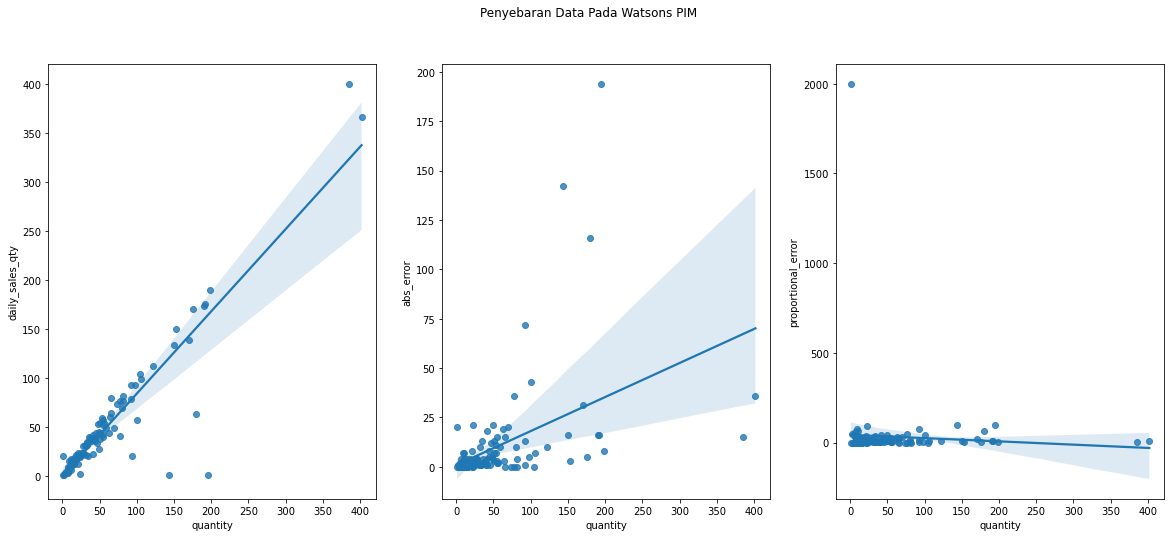

In [36]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
fig.suptitle("Penyebaran Data Pada Watsons PIM")

sns.regplot(x = 'quantity' , y = 'daily_sales_qty',data= temp,ax=axes[0])
sns.regplot(x= 'quantity',y='abs_error',data= temp,ax=axes[1])
sns.regplot(x= 'quantity',y='proportional_error',data = temp,ax=axes[2])
plt.show()

dari grafik diatas, terlihat proportional_error terhadap quantity tidak dapat dianalis karena terdapat <b style="font-size : 18px">outlier yang sangat besar.</b>
<br> oleh karena itu, akan dilakukan regraph ulang tanpa data outlier

In [37]:
temp[temp.proportional_error > 1000]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
91,2412,1.0,21,-20.0,20.0,2000.0


tingkat error yang terjadi sangat besar. <b>data dapat disebut outlier</b>

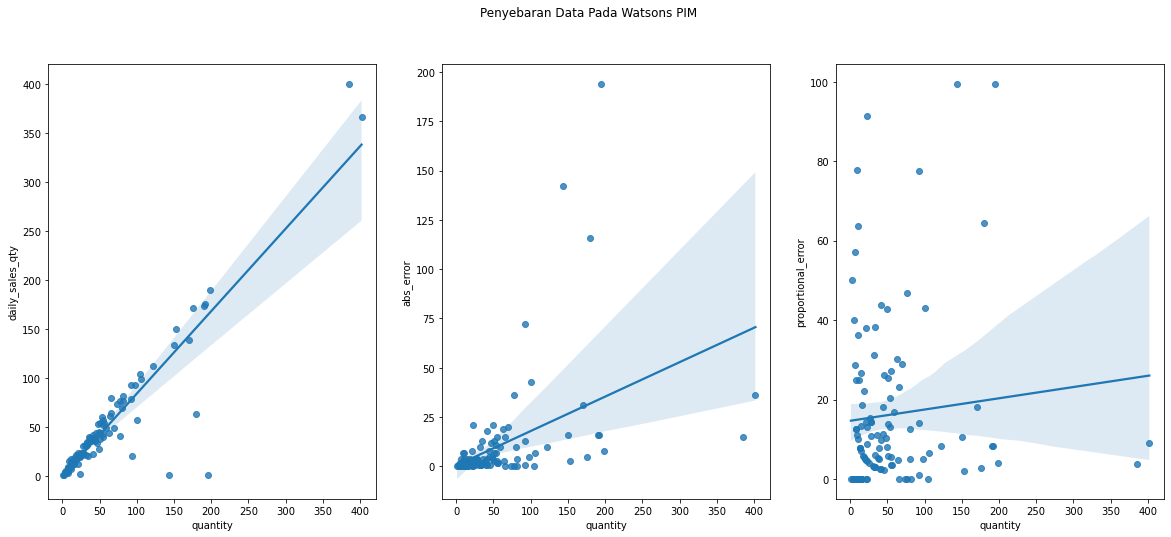

In [38]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
fig.suptitle("Penyebaran Data Pada Watsons PIM")

sns.regplot(x = 'quantity' , y = 'daily_sales_qty',data= temp[temp.proportional_error < 1000],ax=axes[0])
sns.regplot(x= 'quantity',y='abs_error',data= temp[temp.proportional_error < 1000],ax=axes[1])
sns.regplot(x= 'quantity',y='proportional_error',data = temp[temp.proportional_error < 1000],ax=axes[2])
plt.show()

dari ketiga gambar diatas, <b>penyebaran error</b> terhadap banyak nya jumlah barang yang terjual <b>sangat acak.</b>

<AxesSubplot:xlabel='default_code', ylabel='quantity'>

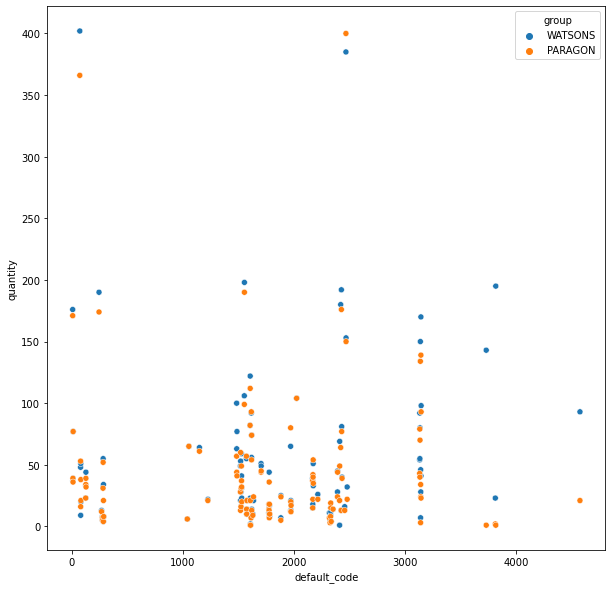

In [39]:
temp2 = pd.DataFrame()
temp2['default_code'] = temp.default_code
temp2['quantity'] = temp.quantity
temp2['group'] = "WATSONS"

temp3 = pd.DataFrame()
temp3['default_code'] = temp.default_code
temp3['quantity'] = temp.daily_sales_qty
temp3['group'] = "PARAGON"

temp4 = pd.concat([temp2,temp3],ignore_index=True)

fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x="default_code",y="quantity",hue='group',data=temp4,ax=axes)

In [40]:
def inttostr(integer):
    return str(integer[0])

temp.default_code = temp.apply(inttostr,axis=1)
temp

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
0,9.0,176.0,171,5.0,5.0,2.840909
1,11.0,37.0,39,-2.0,2.0,5.405405
2,12.0,39.0,36,3.0,3.0,7.692308
3,13.0,77.0,77,0.0,0.0,0.000000
4,73.0,402.0,366,36.0,36.0,8.955224
...,...,...,...,...,...,...
112,3146.0,98.0,93,5.0,5.0,5.102041
113,3732.0,143.0,1,142.0,142.0,99.300699
114,3814.0,23.0,2,21.0,21.0,91.304348
115,3818.0,195.0,1,194.0,194.0,99.487179


<AxesSubplot:xlabel='default_code', ylabel='quantity'>

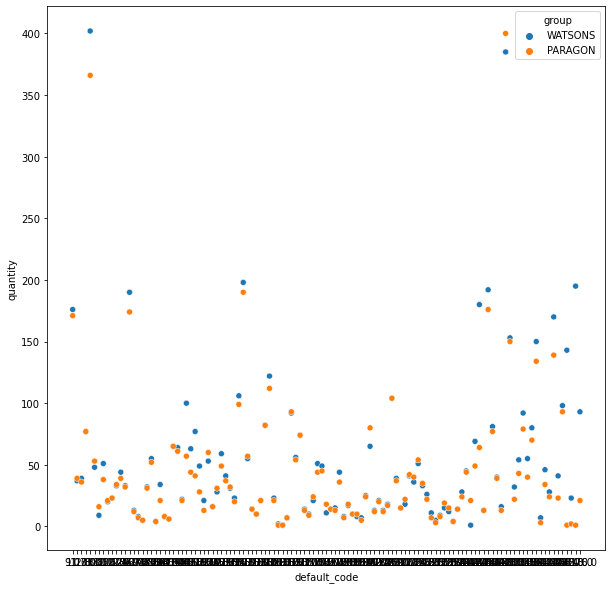

In [41]:
temp2 = pd.DataFrame()
temp2['default_code'] = temp.default_code
temp2['quantity'] = temp.quantity
temp2['group'] = "WATSONS"

temp3 = pd.DataFrame()
temp3['default_code'] = temp.default_code
temp3['quantity'] = temp.daily_sales_qty
temp3['group'] = "PARAGON"

temp4 = pd.concat([temp2,temp3],ignore_index=True)

fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x="default_code",y="quantity",hue='group',data=temp4,ax=axes)

##### Mean Absolute Percentage Error

In [42]:
# melihat Mean Absolute Percentage Error

temp.proportional_error.mean()

33.150432020653454

In [43]:
temp[temp.proportional_error > 40]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
6,81.0,9.0,16,-7.0,7.0,77.777778
26,1485.0,100.0,57,43.0,43.0,43.000000
28,1488.0,77.0,41,36.0,36.0,46.753247
29,1519.0,49.0,28,21.0,21.0,42.857143
47,1609.0,2.0,1,1.0,1.0,50.000000
58,1775.0,11.0,18,-7.0,7.0,63.636364
91,2412.0,1.0,21,-20.0,20.0,2000.000000
93,2422.0,180.0,64,116.0,116.0,64.444444
107,3141.0,7.0,3,4.0,4.0,57.142857
111,3145.0,41.0,23,18.0,18.0,43.902439


#### Kejanggalan Pencatatan Data Watson dan BiVi

In [44]:
temp[temp.error <0]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
1,11.0,37.0,39,-2.0,2.0,5.405405
5,80.0,48.0,53,-5.0,5.0,10.416667
6,81.0,9.0,16,-7.0,7.0,77.777778
8,83.0,20.0,21,-1.0,1.0,5.000000
10,127.0,33.0,34,-1.0,1.0,3.030303
31,1521.0,53.0,60,-7.0,7.0,13.207547
33,1525.0,28.0,31,-3.0,3.0,10.714286
36,1530.0,31.0,32,-1.0,1.0,3.225806
40,1573.0,55.0,57,-2.0,2.0,3.636364
50,1617.0,92.0,93,-1.0,1.0,1.086957


data diatas adalah kumpulan produk yang pencatatan oleh BiVi lebih banyak dibanding dengan jumlah aslinya

In [45]:
bivi[(bivi.default_code == 2412) & (bivi.partner_name == "WATSONS PONDOK INDAH MALL (PIM)")]

,day,month,year,partner_ref,partner_name,default_code,product_name,daily_sales_qty
8802,3,6,2021,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,2
38480,11,6,2021,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
120104,20,7,2021,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
235696,24,9,2021,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
238315,25,9,2021,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
367262,10,11,2021,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
395824,21,11,2021,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
412279,27,11,2021,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
695339,25,2,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
698031,26,2,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1


In [46]:
pim2_watson[(pim2_watson.default_code == 2412)]

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
50520,2021-08-24,47727.0,1.0,PONDOK INDAH MALL 2,1.0,16000.0,14545.45,2412,Wardah Lightening Micellar Gentle Wash 50 ml


dilihat dari data data diatas, bivi tidak mencatat transaksi yang terjadi pada tanggal 24 agustus 2021. sedangkan banyak data data yang muncul entah darimana.
<br> walaupun semua partner_ref merupakan kode putus (bukan titipan).
<br> <b>harus ada analisis lebih dalam terkait hal ini</b>

### Profiling Report

In [47]:
profile = temp.profile_report(title="Profiling Pondok Indah Mall 2")
profile.to_file("Profiling/Pondok Indah Mall 2.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Kesimpulan dari PIM2

<ol>
    <li>Terdapat data-data dari pencatatan BA (BiVi) yang <b>transaksisnya tidak terjadi</b>, solusinya apa ?
    <li>Penyebaran proporsional error <b>sangat acak</b> sehingga perlu adanya analis lebih mendalam.
    </ol>
<b> apakah hal-hal diatas terjadi pada lokasi lain ? </b>

## Location Kokas

karena Kokas adalah salah satu tempat dengan total transaksi tersebesar. kita akan ambil kokas sebagai salah satu sampling

In [48]:
kokas_bivi = bivi[bivi.partner_name == "WATSONS MALL KOTA KASABLANKA (MKK)"]
kokas_bivi = kokas_bivi.groupby(by = "default_code").sum()
drop = ["day","month","year"]
kokas_bivi = kokas_bivi.drop(drop,axis =1)
kokas_bivi.head(3)

,daily_sales_qty
default_code,
9.0,146
11.0,20
12.0,40


In [49]:
kokas_watson = data[(data.location =="KOTA KASABLANKA")]
kokas_watson.head(3)

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
61,2021-06-01,16885.0,8.0,KOTA KASABLANKA,3.0,72000.0,65454.55,2428,Wardah Lightening Face Toner 125 ml
62,2021-06-01,17208.0,8.0,KOTA KASABLANKA,1.0,44900.0,40818.18,2469,Wardah UV Shield Aqua Fresh Essence SPF 50 30 ml
63,2021-06-01,51141.0,8.0,KOTA KASABLANKA,1.0,29500.0,26818.18,2025,Wardah Perfect Bright Tone Up Micellar Water 1...


### Meninjau semua barang yang terjual secara keseluruhan

disini akan menggunakan total_data karena kita mesti meninjau semua product. tanpa perduli apakah barang-barang yang sedang  ditinjau sama. <b> perlu adanya mapping keseluruhan agar lebih presisi </b>

In [50]:
bivi[bivi.partner_name == "WATSONS MALL KOTA KASABLANKA (MKK)"].daily_sales_qty.sum() # punya paragon

45507

In [51]:
total_data[total_data.Location == "KOTA KASABLANKA"].Quantity.sum() # punya watsons

45836.0

In [52]:
(total_data[total_data.Location == "KOTA KASABLANKA"].Quantity.sum()-kokas_bivi.daily_sales_qty.sum())/total_data[total_data.Location == "KOTA KASABLANKA"].Quantity.sum() *100

0.7221398027751113

dengan kata lain, ada sekitar <b> 0.72213 data barang yang terjual tidak tercatat oleh BA </b> dengan catatan tidak melihat apakah barang yang sedang ditinjau sama

### Transformasi Data Prodak Sampling saja

membuat table baru dan membuat scatter plot

In [53]:
kokas_watson.groupby(['default_code']).sum()

,code_watson,location_id,quantity,price_afterPPN,price_beforePPN
default_code,,,,,
9,7807142.0,776.0,153.0,3063200.0,2780093.29
11,1077344.0,128.0,19.0,559240.0,508399.97
12,2895405.0,344.0,47.0,1360115.0,1234577.84
13,2597690.0,376.0,53.0,3937360.0,3572762.23
73,8326944.0,1152.0,239.0,9557800.0,8664584.74
...,...,...,...,...,...
3817,995040.0,96.0,13.0,974000.0,885454.55
3818,4568076.0,552.0,83.0,7614240.0,6912363.03
3889,4838650.0,568.0,81.0,3589450.0,3254508.99


dari table mapping, ada 150 data yang bisa di mapping. <br>
dari hasil inner join dari pembuatan dataframe baru cuman sekitar 116 data. perlu diselidiki

In [54]:
temp = pd.merge(kokas_watson.groupby(['default_code']).sum(),kokas_bivi,on="default_code")
temp = temp[['quantity','daily_sales_qty']].reset_index()
temp

,default_code,quantity,daily_sales_qty
0,9,153.0,146
1,11,19.0,20
2,12,47.0,40
3,13,53.0,50
4,73,239.0,232
...,...,...,...
107,3816,85.0,2
108,3818,83.0,1
109,3889,81.0,3
110,3890,32.0,1


setelah di inner join dengan data BiVi, hanya ada 112 produk terdata

### Meninjau Produk Sampling

In [55]:
temp.quantity.sum()

5696.0

In [56]:
temp.daily_sales_qty.sum()

4686

In [57]:
(temp.daily_sales_qty.sum()-temp.quantity.sum())/temp.quantity.sum() *100

-17.73174157303371

Jumlah barang terjual menurut <b>Watsons 5696.0</b> sedangkan menurut <b>paragon 4686</b> dan <b>error</b> yang terjadi meninjau semua barang yang termaping adalah <b>-17.73174157303371</b>

#### Analisis Statistik

In [58]:
temp['error'] = temp.quantity - temp.daily_sales_qty
temp['abs_error'] = abs(temp.error)
temp['proportional_error'] = temp.abs_error/temp.quantity *100

In [59]:
temp[temp.quantity == temp.quantity.max()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
92,2469,321.0,312,9.0,9.0,2.803738


In [60]:
temp[temp.quantity == temp.quantity.min()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
14,282,5.0,4,1.0,1.0,20.0
100,3141,5.0,2,3.0,3.0,60.0


##### Scatter Plot (Penyebaran Data)

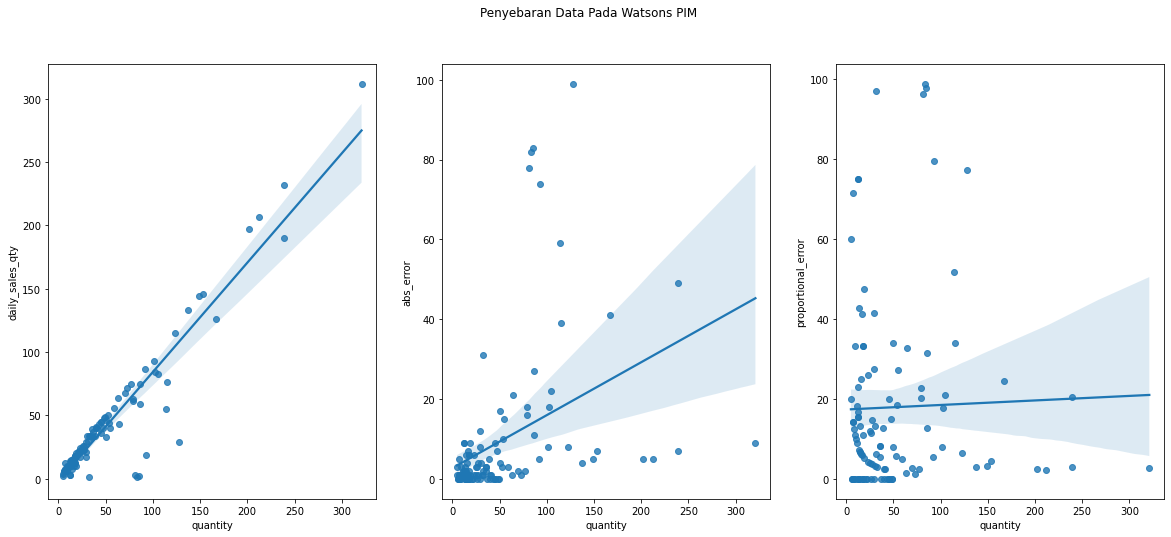

In [61]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
fig.suptitle("Penyebaran Data Pada Watsons PIM")

sns.regplot(x = 'quantity' , y = 'daily_sales_qty',data= temp,ax=axes[0])
sns.regplot(x= 'quantity',y='abs_error',data= temp,ax=axes[1])
sns.regplot(x= 'quantity',y='proportional_error',data = temp,ax=axes[2])
plt.show()

dari ketiga gambar diatas, penyebaran error terhadap banyak nya jumlah barang yang terjual sangat acak.

<AxesSubplot:xlabel='default_code', ylabel='quantity'>

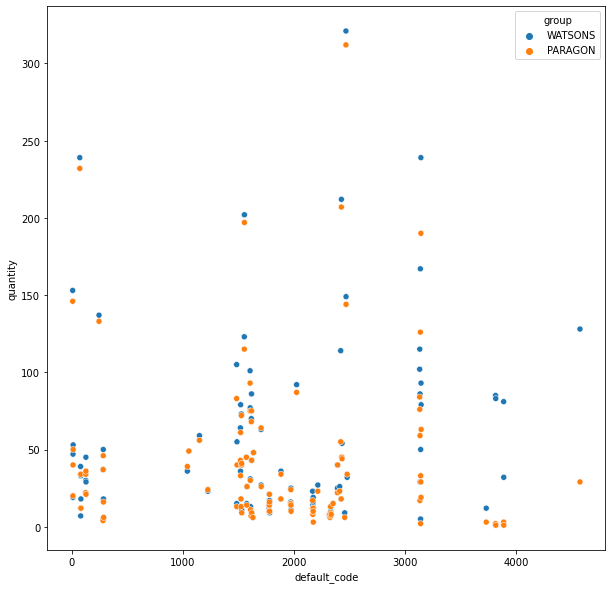

In [62]:
temp2 = pd.DataFrame()
temp2['default_code'] = temp.default_code
temp2['quantity'] = temp.quantity
temp2['group'] = "WATSONS"

temp3 = pd.DataFrame()
temp3['default_code'] = temp.default_code
temp3['quantity'] = temp.daily_sales_qty
temp3['group'] = "PARAGON"

temp4 = pd.concat([temp2,temp3],ignore_index=True)

fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x="default_code",y="quantity",hue='group',data=temp4,ax=axes)

In [63]:
def inttostr(integer):
    return str(integer[0])

temp.default_code = temp.apply(inttostr,axis=1)
temp

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
0,9.0,153.0,146,7.0,7.0,4.575163
1,11.0,19.0,20,-1.0,1.0,5.263158
2,12.0,47.0,40,7.0,7.0,14.893617
3,13.0,53.0,50,3.0,3.0,5.660377
4,73.0,239.0,232,7.0,7.0,2.928870
...,...,...,...,...,...,...
107,3816.0,85.0,2,83.0,83.0,97.647059
108,3818.0,83.0,1,82.0,82.0,98.795181
109,3889.0,81.0,3,78.0,78.0,96.296296
110,3890.0,32.0,1,31.0,31.0,96.875000


<AxesSubplot:xlabel='default_code', ylabel='quantity'>

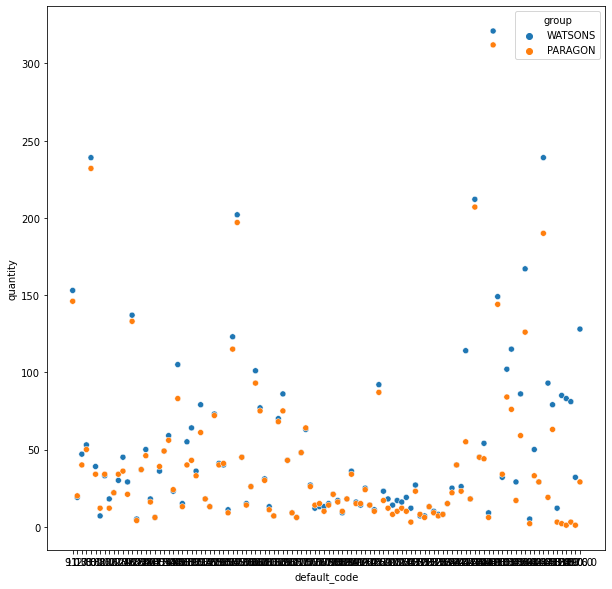

In [64]:
temp2 = pd.DataFrame()
temp2['default_code'] = temp.default_code
temp2['quantity'] = temp.quantity
temp2['group'] = "WATSONS"

temp3 = pd.DataFrame()
temp3['default_code'] = temp.default_code
temp3['quantity'] = temp.daily_sales_qty
temp3['group'] = "PARAGON"

temp4 = pd.concat([temp2,temp3],ignore_index=True)

fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x="default_code",y="quantity",hue='group',data=temp4,ax=axes)

##### Mean Absolute Percentage Error

In [65]:
# melihat Mean Absolute Percentage Error

temp.proportional_error.mean()

17.94995659674579

In [66]:
temp[temp.proportional_error > 40]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
6,81.0,7.0,12,-5.0,5.0,71.428571
70,2171.0,14.0,8,6.0,6.0,42.857143
71,2172.0,17.0,10,7.0,7.0,41.176471
73,2174.0,19.0,10,9.0,9.0,47.368421
74,2175.0,12.0,3,9.0,9.0,75.000000
86,2422.0,114.0,55,59.0,59.0,51.754386
97,3135.0,29.0,17,12.0,12.0,41.379310
100,3141.0,5.0,2,3.0,3.0,60.000000
104,3145.0,93.0,19,74.0,74.0,79.569892
106,3732.0,12.0,3,9.0,9.0,75.000000


#### Analisis Kejanggalan

In [67]:
temp[temp.error <0]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
1,11.0,19.0,20,-1.0,1.0,5.263158
6,81.0,7.0,12,-5.0,5.0,71.428571
7,82.0,33.0,34,-1.0,1.0,3.030303
10,127.0,30.0,34,-4.0,4.0,13.333333
19,1041.0,36.0,39,-3.0,3.0,8.333333
22,1226.0,23.0,24,-1.0,1.0,4.347826
33,1530.0,40.0,41,-1.0,1.0,2.500000
51,1705.0,63.0,64,-1.0,1.0,1.587302
53,1775.0,12.0,14,-2.0,2.0,16.666667
54,1776.0,13.0,15,-2.0,2.0,15.384615


dataframe diatas merupakan kumpulan  data yang <b>pencatatan BiVi lebih dari Watsons

### Profiling Report

In [68]:
profile = temp.profile_report(title="Profiling Kota Kasablanka")
profile.to_file("Profiling/Kota Kasablanka.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Kesimpulan dari kokas

<ol>
    <li>Tetap ada Data yang pencatatan jumlah <b>penjualan paragon lebih dari Watsons </b>
    </ol>

## Location DP MALL SEMARANG

Pada <b>data Watsons</b>, DP MALL SEMARANG merupakan salah satu <b>tempat</b> yang memiliki <b>transaksi yang banyak</b>. sedangkan pada <b>data BiVi</b>, DP MALL SEMARANG <b>tidak memiliki banyak transaksi</b> yang terjadi

In [69]:
bivi[bivi.partner_name == "WATSONS DP MALL SEMARANG <DPM>"]

,day,month,year,partner_ref,partner_name,default_code,product_name,daily_sales_qty
546,1,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1578.0,Wardah Acnederm Night Treatment Moisturizer 40...,1
547,1,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1485.0,Wardah Anti Dandruff Shampoo 170 ml (pc(s)),3
548,1,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,2428.0,Wardah Lightening Face Toner 125 ml,1
549,1,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1485.0,Wardah Anti Dandruff Shampoo 170 ml (pc(s)),1
550,1,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1519.0,Wardah Perfect Bright Creamy Foam Brightening ...,1
...,...,...,...,...,...,...,...,...
1032495,29,5,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,3098.0,Wardah UV Shield Essential Sunscreen Gel SPF 3...,1
1032496,29,5,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,4183.0,Wardah Perfect Bright Creamy Foam Brightening ...,1
1032497,29,5,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,283.0,Wardah Pure Olive Oil 50 ml,1
1032498,29,5,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,2334.0,Wardah Lightening Oil-Infused Micellar Water 1...,1


In [70]:
data[(data.location =="NEW DP MALL SEMARANG")]

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
949,2021-06-01,16885.0,121.0,NEW DP MALL SEMARANG,1.0,24000.0,21818.18,2428,Wardah Lightening Face Toner 125 ml
950,2021-06-01,17208.0,121.0,NEW DP MALL SEMARANG,2.0,89800.0,81636.36,2469,Wardah UV Shield Aqua Fresh Essence SPF 50 30 ml
951,2021-06-01,54094.0,121.0,NEW DP MALL SEMARANG,1.0,22600.0,20545.45,3146,Wardah Crystal Secret Melting Milk Cleanser 100
952,2021-06-01,57062.0,121.0,NEW DP MALL SEMARANG,1.0,32000.0,29090.91,1150,Wardah C-Defense Energizing Creamy Wash 100 ml...
953,2021-06-01,57826.0,121.0,NEW DP MALL SEMARANG,1.0,33600.0,30545.45,73,Wardah EyeXpert Eye & Lip Make Up Remover 100 ml
...,...,...,...,...,...,...,...,...,...
281196,2022-05-29,73743.0,121.0,NEW DP MALL SEMARANG,1.0,18900.0,17027.03,1485,Wardah Anti Dandruff Shampoo 170 ml (Pc(s))
281197,2022-05-29,47734.0,121.0,NEW DP MALL SEMARANG,1.0,28000.0,25225.23,283,Wardah Pure Olive Oil 50 ml (Pc(s))
281198,2022-05-29,81241.0,121.0,NEW DP MALL SEMARANG,5.0,390000.0,351351.35,3814,Wardah Renew You Treatment Essence 100 ml (Pc(s))
281199,2022-05-29,15468.0,121.0,NEW DP MALL SEMARANG,1.0,22000.0,19819.82,2332,Wardah Nature Daily Tea Tree Oil Control Clay ...


In [71]:
total_data[total_data.Location == "NEW DP MALL SEMARANG"]

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
4692,2021-06-01,10568.0,EMINA CREAMYTINT 01 BRICK TOWN,121.0,NEW DP MALL SEMARANG,1.0,44000.0,40000.00
4693,2021-06-01,10573.0,MAKE OVER P/STAY FIX&MAT SET S,121.0,NEW DP MALL SEMARANG,1.0,73500.0,66818.18
4694,2021-06-01,10580.0,WARDAH LIGHT PWDR FDT LF 05 BE,121.0,NEW DP MALL SEMARANG,1.0,52500.0,47727.27
4695,2021-06-01,15001.0,MO P/STAY TRANSPROOF LIPS CRM,121.0,NEW DP MALL SEMARANG,1.0,125000.0,113636.36
4696,2021-06-01,15002.0,MO P/STAY TRANSPROOF LIPS CRM,121.0,NEW DP MALL SEMARANG,1.0,125000.0,113636.36
...,...,...,...,...,...,...,...,...
1475990,2022-05-29,83797.0,WARDAH INSTA M/M BB CUS 12 IVO,121.0,NEW DP MALL SEMARANG,1.0,126700.0,114144.14
1475991,2022-05-29,83877.0,WARDAH INSTA LINER BLACK,121.0,NEW DP MALL SEMARANG,2.0,188000.0,169369.37
1475992,2022-05-29,85025.0,WARDAH INSTA MAT PWD/F.13 REF,121.0,NEW DP MALL SEMARANG,1.0,72000.0,64864.86
1475993,2022-05-29,85175.0,WARDAH EXC FLAWLESS CC 01,121.0,NEW DP MALL SEMARANG,1.0,141000.0,127027.03


Akan tetapi, setelah dilakukan mapping, Jumlah transaksi yang dialami hampir sama banyaknya.

In [72]:
DPMallSemarang_bivi = bivi[bivi.partner_name == "WATSONS DP MALL SEMARANG <DPM>"]
DPMallSemarang_bivi = DPMallSemarang_bivi.groupby(by = "default_code").sum()
drop = ["day","month","year"]
DPMallSemarang_bivi = DPMallSemarang_bivi.drop(drop,axis =1)
DPMallSemarang_bivi.head(3)

,daily_sales_qty
default_code,
9.0,116
11.0,14
12.0,18


In [73]:
DPMallSemarang_watson = data[(data.location =="NEW DP MALL SEMARANG")]
DPMallSemarang_watson.head(3)

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
949,2021-06-01,16885.0,121.0,NEW DP MALL SEMARANG,1.0,24000.0,21818.18,2428,Wardah Lightening Face Toner 125 ml
950,2021-06-01,17208.0,121.0,NEW DP MALL SEMARANG,2.0,89800.0,81636.36,2469,Wardah UV Shield Aqua Fresh Essence SPF 50 30 ml
951,2021-06-01,54094.0,121.0,NEW DP MALL SEMARANG,1.0,22600.0,20545.45,3146,Wardah Crystal Secret Melting Milk Cleanser 100


### Meninjau semua barang yang terjual secara keseluruhan

disini akan menggunakan total_data karena kita mesti meninjau semua product. tanpa perduli apakah barang-barang yang sedang  ditinjau sama. <b> perlu adanya mapping keseluruhan agar lebih presisi </b>

In [74]:
bivi[bivi.partner_name == "WATSONS DP MALL SEMARANG <DPM>"].daily_sales_qty.sum() # punya paragon

3748

In [75]:
total_data[total_data.Location == "NEW DP MALL SEMARANG"].Quantity.sum() # punya watsons

19415.0

In [76]:
(total_data[total_data.Location == "NEW DP MALL SEMARANG"].Quantity.sum()-DPMallSemarang_bivi.daily_sales_qty.sum())/total_data[total_data.Location == "NEW DP MALL SEMARANG"].Quantity.sum() *100

80.6953386556786

dengan kata lain, ada sekitar <b> 80.7 data barang yang terjual tidak tercatat oleh BA </b> dengan catatan tidak melihat apakah barang yang sedang ditinjau sama. Tingkat error pada jumlah semua produk terlalu banyak.

### Transformasi Data Prodak Sampling saja

membuat table baru dan membuat scatter plot

In [77]:
DPMallSemarang_watson.groupby(['default_code']).sum()

,code_watson,location_id,quantity,price_afterPPN,price_beforePPN
default_code,,,,,
9,6277908.0,9438.0,137.0,2555700.0,2318638.74
11,1414014.0,2541.0,26.0,756400.0,686082.70
12,1481370.0,2662.0,26.0,707800.0,642103.19
13,1492290.0,3267.0,32.0,2239400.0,2030253.91
73,4626080.0,9680.0,98.0,4023100.0,3646192.49
...,...,...,...,...,...
3817,746280.0,1089.0,9.0,599900.0,545363.63
3818,1522692.0,2783.0,26.0,2277700.0,2068271.88
3889,1499300.0,2662.0,27.0,1192600.0,1080470.94


dari table mapping, ada 150 data yang bisa di mapping. <br>
dari hasil inner join dari pembuatan dataframe baru cuman sekitar 116 data. perlu diselidiki

In [78]:
temp = pd.merge(DPMallSemarang_watson.groupby(['default_code']).sum(),DPMallSemarang_bivi,on="default_code")
temp = temp[['quantity','daily_sales_qty']].reset_index()
temp

,default_code,quantity,daily_sales_qty
0,9,137.0,116
1,11,26.0,14
2,12,26.0,18
3,13,32.0,25
4,73,98.0,79
...,...,...,...
105,3732,23.0,1
106,3814,38.0,6
107,3816,26.0,5
108,3889,27.0,3


setelah di inner join dengan data BiVi, hanya ada 110 produk terdata. berarti ada 6 data produk dari watsons yang hilang

### Meninjau Produk Sampling

In [79]:
temp.quantity.sum()

3802.0

In [80]:
temp.daily_sales_qty.sum()

2531

In [81]:
(temp.daily_sales_qty.sum()-temp.quantity.sum())/temp.quantity.sum() *100

-33.42977380326144

Jumlah barang terjual menurut <b>Watsons 3802.0</b> sedangkan menurut <b>paragon 2531</b> dan <b>error</b> yang terjadi meninjau semua barang yang termaping adalah <b>-33.42</b>. tingkat error yang terjadi menurun secara signifikan dibandingkan meninjau keseluruhan barang. Tampak tidak mewakili secara nyata karena data BiVi untuk transaksi lama tidak akan bertambah. <b> perlu diselidiki lebih lanjut </b>

#### Analisis Statistik

In [82]:
temp['error'] = temp.quantity - temp.daily_sales_qty
temp['abs_error'] = abs(temp.error)
temp['proportional_error'] = temp.abs_error/temp.quantity *100

In [83]:
temp[temp.quantity == temp.quantity.max()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
91,2469,206.0,143,63.0,63.0,30.582524


In [84]:
temp[temp.quantity == temp.quantity.min()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
79,2333,1.0,1,0.0,0.0,0.0


In [85]:
temp[temp.abs_error == temp.abs_error.min()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
41,1608,10.0,10,0.0,0.0,0.0
42,1610,6.0,6,0.0,0.0,0.0
43,1615,2.0,2,0.0,0.0,0.0
72,2174,7.0,7,0.0,0.0,0.0
79,2333,1.0,1,0.0,0.0,0.0


In [86]:
bivi[(bivi.partner_name == "WATSONS DP MALL SEMARANG <DPM>") & (bivi.default_code == 1608)]

,day,month,year,partner_ref,partner_name,default_code,product_name,daily_sales_qty
8866,3,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
12378,4,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
22116,6,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
68325,20,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
71744,21,6,2021,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
705776,28,2,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
711221,2,3,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
740532,11,3,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
867549,22,4,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1
995411,19,5,2022,118191-080,WATSONS DP MALL SEMARANG <DPM>,1608.0,Wardah Nature Daily Seaweed Balancing Facial W...,1


In [87]:
DPMallSemarang_watson[DPMallSemarang_watson.default_code ==1608]

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
6661,2021-06-06,57824.0,121.0,NEW DP MALL SEMARANG,1.0,16000.0,14545.45,1608,Wardah Nature Daily Seaweed Balancing Facial W...
79732,2021-10-02,57824.0,121.0,NEW DP MALL SEMARANG,1.0,16000.0,14545.45,1608,Wardah Nature Daily Seaweed Balancing Facial W...
80925,2021-10-03,57824.0,121.0,NEW DP MALL SEMARANG,1.0,16000.0,14545.45,1608,Wardah Nature Daily Seaweed Balancing Facial W...
102600,2021-10-31,57824.0,121.0,NEW DP MALL SEMARANG,1.0,16000.0,14545.45,1608,Wardah Nature Daily Seaweed Balancing Facial W...
157907,2021-12-31,57824.0,121.0,NEW DP MALL SEMARANG,1.0,16000.0,14545.45,1608,Wardah Nature Daily Seaweed Balancing Facial W...
201720,2022-02-28,57824.0,121.0,NEW DP MALL SEMARANG,1.0,16000.0,14545.45,1608,Wardah Nature Daily Seaweed Balancing Facial W...
202880,2022-03-02,57824.0,121.0,NEW DP MALL SEMARANG,1.0,16000.0,14545.45,1608,Wardah Nature Daily Seaweed Balancing Facial W...
209629,2022-03-11,57824.0,121.0,NEW DP MALL SEMARANG,1.0,12000.0,10909.09,1608,Wardah Nature Daily Seaweed Balancing Facial W...
241517,2022-04-22,57824.0,121.0,NEW DP MALL SEMARANG,1.0,13600.0,12252.25,1608,Wardah Nature Daily Seaweed Balancing Facial W...
272337,2022-05-19,57824.0,121.0,NEW DP MALL SEMARANG,1.0,17000.0,15315.32,1608,Wardah Nature Daily Seaweed Balancing Facial W...


walaupun <b> error yang terjadi 0 </b>, pada nyatanya  data yang disajikan <b> berbeda </b>. di pada tahun 2021

In [88]:
temp[temp.abs_error == temp.abs_error.max()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
85,2422,200.0,82,118.0,118.0,59.0


In [89]:
temp[temp.proportional_error == temp.proportional_error.max()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
109,3890,24.0,1,23.0,23.0,95.833333


##### Scatter Plot (Penyebaran Data)

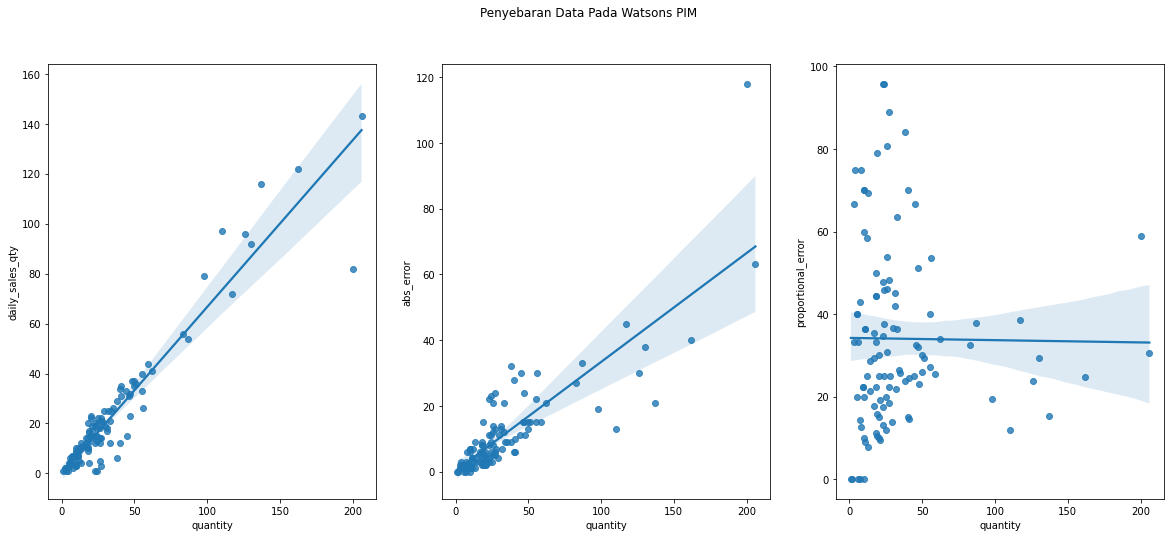

In [90]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
fig.suptitle("Penyebaran Data Pada Watsons PIM")

sns.regplot(x = 'quantity' , y = 'daily_sales_qty',data= temp,ax=axes[0])
sns.regplot(x= 'quantity',y='abs_error',data= temp,ax=axes[1])
sns.regplot(x= 'quantity',y='proportional_error',data = temp,ax=axes[2])
plt.show()

dari ketiga gambar diatas, penyebaran error terhadap banyak nya jumlah barang yang terjual sangat acak.

<AxesSubplot:xlabel='default_code', ylabel='quantity'>

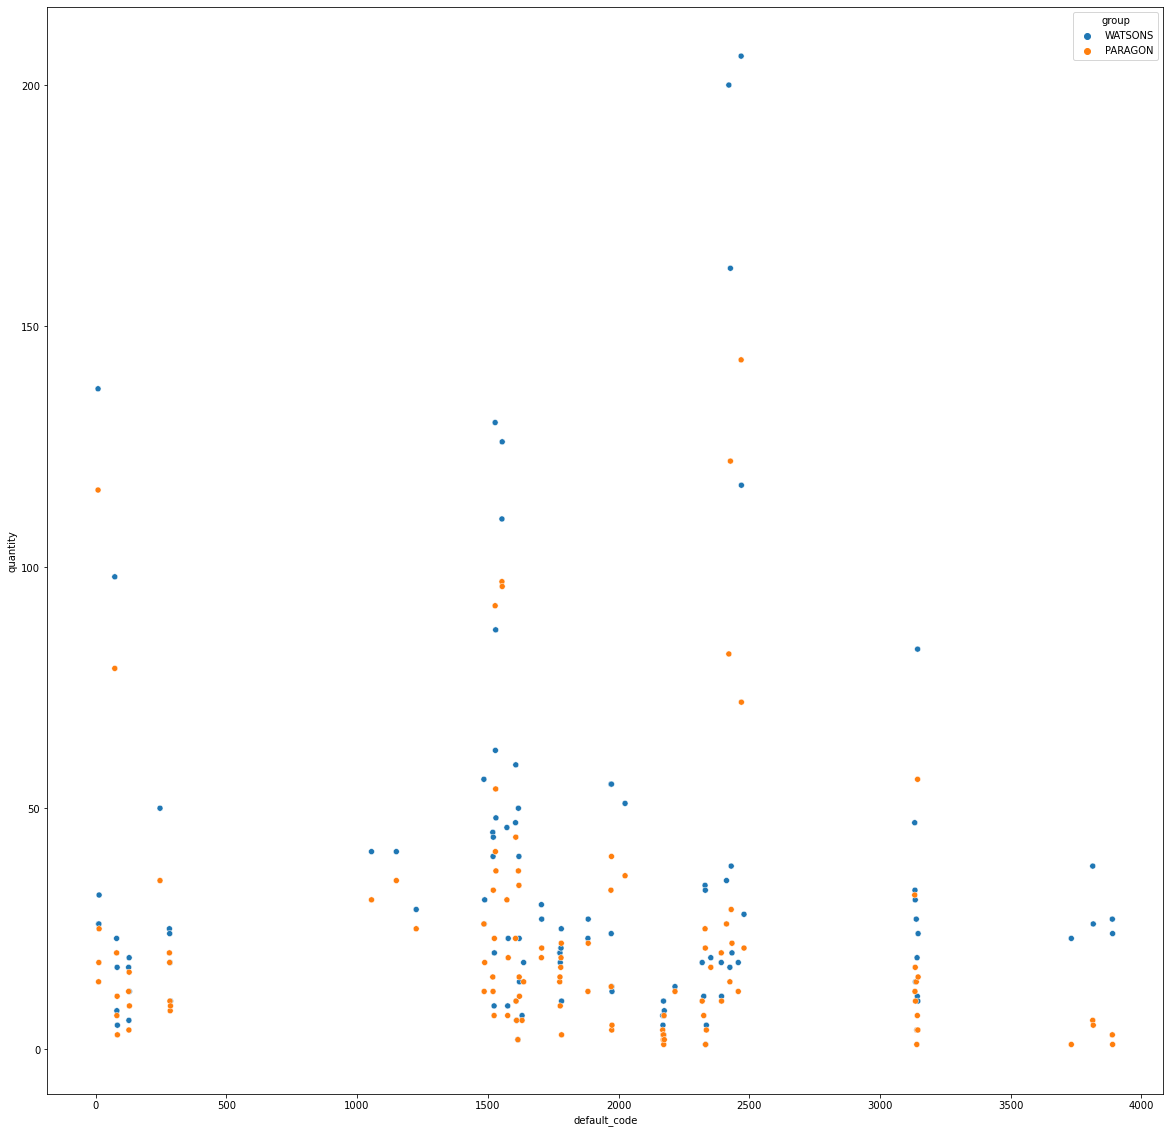

In [91]:
temp2 = pd.DataFrame()
temp2['default_code'] = temp.default_code
temp2['quantity'] = temp.quantity
temp2['group'] = "WATSONS"

temp3 = pd.DataFrame()
temp3['default_code'] = temp.default_code
temp3['quantity'] = temp.daily_sales_qty
temp3['group'] = "PARAGON"

temp4 = pd.concat([temp2,temp3],ignore_index=True)

fig,axes = plt.subplots(1,1,figsize=(20,20))
sns.scatterplot(x="default_code",y="quantity",hue='group',data=temp4,ax=axes)

In [92]:
def inttostr(integer):
    return str(integer[0])

temp.default_code = temp.apply(inttostr,axis=1)
temp

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
0,9.0,137.0,116,21.0,21.0,15.328467
1,11.0,26.0,14,12.0,12.0,46.153846
2,12.0,26.0,18,8.0,8.0,30.769231
3,13.0,32.0,25,7.0,7.0,21.875000
4,73.0,98.0,79,19.0,19.0,19.387755
...,...,...,...,...,...,...
105,3732.0,23.0,1,22.0,22.0,95.652174
106,3814.0,38.0,6,32.0,32.0,84.210526
107,3816.0,26.0,5,21.0,21.0,80.769231
108,3889.0,27.0,3,24.0,24.0,88.888889


<AxesSubplot:xlabel='default_code', ylabel='quantity'>

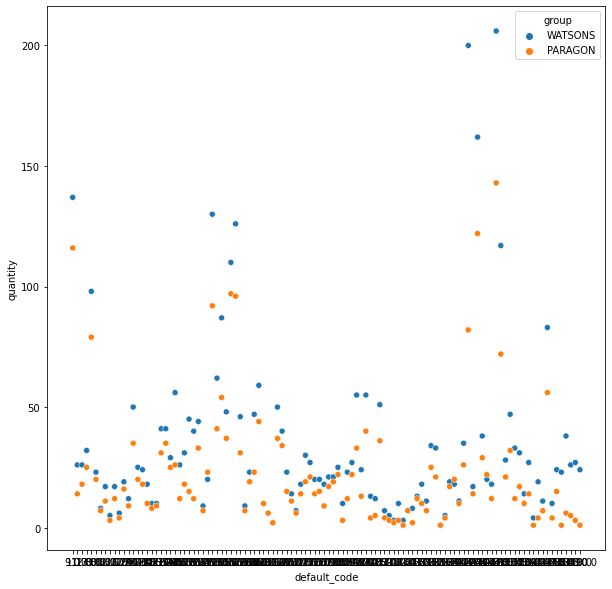

In [93]:
temp2 = pd.DataFrame()
temp2['default_code'] = temp.default_code
temp2['quantity'] = temp.quantity
temp2['group'] = "WATSONS"

temp3 = pd.DataFrame()
temp3['default_code'] = temp.default_code
temp3['quantity'] = temp.daily_sales_qty
temp3['group'] = "PARAGON"

temp4 = pd.concat([temp2,temp3],ignore_index=True)

fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x="default_code",y="quantity",hue='group',data=temp4,ax=axes)

##### Mean Absolute Percentage Error

In [94]:
# melihat Mean Absolute Percentage Error

temp.proportional_error.mean()

34.02222778205612

In [95]:
temp[temp.proportional_error > 40]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
1,11.0,26.0,14,12.0,12.0,46.153846
16,284.0,18.0,10,8.0,8.0,44.444444
22,1485.0,56.0,26,30.0,30.0,53.571429
23,1486.0,26.0,12,14.0,14.0,53.846154
24,1488.0,31.0,18,13.0,13.0,41.935484
25,1519.0,45.0,15,30.0,30.0,66.666667
26,1520.0,40.0,12,28.0,28.0,70.000000
39,1606.0,47.0,23,24.0,24.0,51.063830
54,1777.0,18.0,9,9.0,9.0,50.000000
58,1782.0,10.0,3,7.0,7.0,70.000000


#### Analisis Kejanggalan

In [96]:
temp[temp.error <0]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
29,1525.0,20.0,23,-3.0,3.0,15.000000
82,2393.0,18.0,20,-2.0,2.0,11.111111
89,2434.0,20.0,22,-2.0,2.0,10.000000


dataframe diatas merupakan kumpulan  data yang <b>pencatatan BiVi lebih dari Watsons

### Profiling Report

In [97]:
profile = temp.profile_report(title="Profiling DP MALL SEMARANG")
profile.to_file("Profiling/DP MALL SEMARANG.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Kesimpulan dari DP MALL SEMARANG

# EDA Bivi dan Watsons Data 2022 

## Transformasi Data dan Analisis Data Secara Keseluruhan

Mengambil Data BiVi dan Watsons untuk tahun 2022. 
<br> Semua Data Watsons 2022 => total_watsons2022
<br> Data Watsons 2022 hasil mapping => watsons2022
<br> Data BiVi 2022    => bivi2022

In [98]:
total_watsons2022 = total_data[total_data.Tanggal >= "2022-1-1"].reset_index(drop=True)
total_watsons2022

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
0,2022-01-01,10889.0,WARDAH COLORFIT ULTRA LIP/MAT,1.0,PONDOK INDAH MALL 2,3.0,119333.00,108484.55
1,2022-01-01,10890.0,WARDAH COLORFIT ULTRA LIP/MAT,1.0,PONDOK INDAH MALL 2,1.0,33333.00,30302.73
2,2022-01-01,11551.0,Crystallure Act Booster Essenc,1.0,PONDOK INDAH MALL 2,2.0,350000.00,318181.82
3,2022-01-01,11552.0,Crystallure Supr Revital Oil S,1.0,PONDOK INDAH MALL 2,1.0,175000.00,159090.91
4,2022-01-01,11554.0,Crystallure Supr Dbl Act Mclr,1.0,PONDOK INDAH MALL 2,4.0,343600.00,312363.64
...,...,...,...,...,...,...,...,...
688330,2022-05-29,68141.0,EMINA S/RUSH LIP SCRUB,917.0,ECOMM CASH DELIVERY,1.0,23460.00,21135.14
688331,2022-05-29,80428.0,EMINA DAILY MAT LOOSE PWDR 01,917.0,ECOMM CASH DELIVERY,1.0,24140.00,21747.75
688332,2022-05-29,80460.0,MO STICK MATTE LIP CRAYON 105,917.0,ECOMM CASH DELIVERY,1.0,69429.00,62548.65
688333,2022-05-29,85371.0,EMINA BRIGHT STUFF L/PWDR 55GR,917.0,ECOMM CASH DELIVERY,4.0,54338.00,48953.15


In [99]:
watsons2022 = data[data.tanggal >= "2022-1-1"].reset_index(drop=True)
watsons2022

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
0,2022-01-01,17208.0,1.0,PONDOK INDAH MALL 2,1.0,57500.0,52272.73,2469,Wardah UV Shield Aqua Fresh Essence SPF 50 30 ml
1,2022-01-01,51141.0,1.0,PONDOK INDAH MALL 2,1.0,29500.0,26818.18,2025,Wardah Perfect Bright Tone Up Micellar Water 1...
2,2022-01-01,54094.0,1.0,PONDOK INDAH MALL 2,1.0,24200.0,22000.00,3146,Wardah Crystal Secret Melting Milk Cleanser 100
3,2022-01-01,54099.0,1.0,PONDOK INDAH MALL 2,2.0,127800.0,116181.82,3139,Wardah Crystal Secret Dark Spot & Brightening ...
4,2022-01-01,57826.0,1.0,PONDOK INDAH MALL 2,2.0,84200.0,76545.45,73,Wardah EyeXpert Eye & Lip Make Up Remover 100 ml
...,...,...,...,...,...,...,...,...,...
123305,2022-05-29,55271.0,915.0,ECOMM HOME DELIVERY,1.0,22571.0,20334.23,3144,Wardah Crystal Secret Foaming Cleanser with Na...
123306,2022-05-29,11554.0,915.0,ECOMM HOME DELIVERY,2.0,123428.0,111196.40,2173,Wardah Crystallure Supreme Double Action Micel...
123307,2022-05-29,50799.0,915.0,ECOMM HOME DELIVERY,3.0,33568.0,30241.44,1971,Wardah Nature Daily Sheet Mask Aloe Vera 20 ml
123308,2022-05-29,50801.0,915.0,ECOMM HOME DELIVERY,3.0,33568.0,30241.44,1973,Wardah Nature Daily Sheet Mask Vitamin C 20 ml


In [100]:
bivi2022 = bivi[bivi.year ==2022].reset_index(drop=True)
bivi2022

,day,month,year,partner_ref,partner_name,default_code,product_name,daily_sales_qty
0,1,1,2022,118191-002,WATSONS BUAH BATU,1578.0,Wardah Acnederm Night Treatment Moisturizer 40...,1
1,1,1,2022,118191-004,WATSONS FESTIVAL CITYLINK,128.0,Wardah Everyday BB Cream Natural 15 ml (Pc(s)),1
2,1,1,2022,118191-004,WATSONS FESTIVAL CITYLINK,2174.0,NaN,1
3,1,1,2022,118191-004,WATSONS FESTIVAL CITYLINK,1528.0,Wardah Everyday Fruity Sheer Lip Balm Strawber...,1
4,1,1,2022,118191-004,WATSONS FESTIVAL CITYLINK,2469.0,Wardah UV Shield Aqua Fresh Essence SPF 50 30 ml,1
...,...,...,...,...,...,...,...,...
493888,29,5,2022,138701-203,WATSONS TEBET STREET,3537.0,Emina Watercolor Lip Serum 03 Dusk 2 g,1
493889,29,5,2022,138701-203,WATSONS TEBET STREET,2403.0,Wardah Lightening Liquid Concealer 01 Light 7 ...,1
493890,29,5,2022,138701-203,WATSONS TEBET STREET,777.0,Emina Cheek Lit Pressed Blush Bittersweet 3.5 ...,1
493891,29,5,2022,138701-203,WATSONS TEBET STREET,79.0,"Wardah Eyexpert Staylast Liquid Eyeliner 3,5 g...",1


In [101]:
(688335 -493893 ) /688335  *100

28.24816404802894

### Kesimpulan Data Secara Keseluruhan

Dilihat dari atas, berikut adalah kesimpulan yang didapat:<br>
<ol style="font-size : 15px">
    <li>Total Pencatatan Watsons untuk semua toko ada 688335</li>
    <li>Total Data Watsons yang didapat setelah melakukan proses mapping adalah 123310, hasil sampling menggunakan produk dari airtables </li>
    <li>Total Pencatatan Data BiVi adalah 493893</li>
    <li>Terdapat 28.24 Persen data yang tidak tercata oleh BiVi
    </ol>

## Location PIM2

In [102]:
pim2_bivi = bivi2022[bivi2022.partner_name == "WATSONS PONDOK INDAH MALL (PIM)"]
pim2_bivi = pim2_bivi.groupby(by = "default_code").sum()
drop = ["day","month","year"]
pim2_bivi = pim2_bivi.drop(drop,axis =1)
pim2_bivi.head(3)

,daily_sales_qty
default_code,
9.0,58
11.0,12
12.0,14


In [103]:
pim2_watson = watsons2022[(watsons2022.location =="PONDOK INDAH MALL 2")]
pim2_watson.head(3)

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
0,2022-01-01,17208.0,1.0,PONDOK INDAH MALL 2,1.0,57500.0,52272.73,2469,Wardah UV Shield Aqua Fresh Essence SPF 50 30 ml
1,2022-01-01,51141.0,1.0,PONDOK INDAH MALL 2,1.0,29500.0,26818.18,2025,Wardah Perfect Bright Tone Up Micellar Water 1...
2,2022-01-01,54094.0,1.0,PONDOK INDAH MALL 2,1.0,24200.0,22000.00,3146,Wardah Crystal Secret Melting Milk Cleanser 100


### Meninjau semua barang yang terjual secara keseluruhan

disini akan menggunakan total_data karena kita mesti meninjau semua product. tanpa perduli apakah barang-barang yang sedang  ditinjau sama. <b style="font-size : 18px"> perlu adanya mapping keseluruhan agar lebih presisi </b>

In [104]:
bivi2022[bivi2022.partner_name == "WATSONS PONDOK INDAH MALL (PIM)"].daily_sales_qty.sum() # punya paragon

20369

In [105]:
total_watsons2022[total_watsons2022.Location == "PONDOK INDAH MALL 2"].Quantity.sum() # punya watsons

19406.0

In [106]:
(total_watsons2022[total_watsons2022.Location == "PONDOK INDAH MALL 2"].Quantity.sum()-pim2_bivi.daily_sales_qty.sum())/total_data[total_data.Location == "PONDOK INDAH MALL 2"].Quantity.sum() *100

-2.463041587805003

dengan kata lain, ada sekitar <b> -2.3% data barang yang terjual tidak tercatat oleh BA </b>

### Transformasi Data Prodak Sampling saja

membuat table baru dan membuat scatter plot

In [107]:
pim2_watson.groupby(['default_code']).sum()

,code_watson,location_id,quantity,price_afterPPN,price_beforePPN
default_code,,,,,
9,3541384.0,44.0,59.0,1293800.0,1171813.22
11,942676.0,14.0,14.0,425800.0,385537.24
12,740685.0,11.0,12.0,355500.0,322100.72
13,1768640.0,32.0,42.0,2888050.0,2612117.53
73,4510428.0,78.0,147.0,6262300.0,5668261.28
...,...,...,...,...,...
3817,414600.0,5.0,5.0,361000.0,326756.76
3818,4237056.0,64.0,107.0,9792765.0,8879116.67
3889,2248950.0,33.0,46.0,2130525.0,1922600.09


dari table mapping, ada 150 data yang bisa di mapping. <br>
dari hasil inner join dari pembuatan dataframe baru cuman sekitar 128 data. perlu diselidiki

In [108]:
temp = pd.merge(pim2_watson.groupby(['default_code']).sum(),pim2_bivi,on="default_code")
temp = temp[['quantity','daily_sales_qty']].reset_index()
temp

,default_code,quantity,daily_sales_qty
0,9,59.0,58
1,11,14.0,12
2,12,12.0,14
3,13,42.0,44
4,73,147.0,138
...,...,...,...
96,3146,65.0,66
97,3732,44.0,1
98,3814,2.0,2
99,3818,107.0,1


### Meninjau Produk Sampling

In [109]:
temp.quantity.sum()

2838.0

In [110]:
temp.daily_sales_qty.sum()

2490

In [111]:
(temp.daily_sales_qty.sum()-temp.quantity.sum())/temp.quantity.sum() *100

-12.26215644820296

Jumlah barang terjual menurut <b>Watsons 6299.0</b> sedangkan menurut <b>paragon 5347</b> dan <b>error</b> yang terjadi meninjau semua barang yang termaping adalah <b>-12.26215644820296</b>

#### Analisis Statistik

In [112]:
temp['error'] = temp.quantity - temp.daily_sales_qty
temp['abs_error'] = abs(temp.error)
temp['proportional_error'] = temp.abs_error/temp.quantity *100

In [113]:
temp[temp.quantity == temp.quantity.max()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
83,2469,184.0,184,0.0,0.0,0.0


In [114]:
temp[temp.quantity == temp.quantity.min()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
71,2320,1.0,1,0.0,0.0,0.0
73,2336,1.0,1,0.0,0.0,0.0
91,3141,1.0,1,0.0,0.0,0.0


In [115]:
temp[temp.abs_error == temp.abs_error.max()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
99,3818,107.0,1,106.0,106.0,99.065421


In [116]:
temp[temp.abs_error == temp.abs_error.min()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
5,80,21.0,21,0.0,0.0,0.0
10,128,19.0,19,0.0,0.0,0.0
13,269,7.0,7,0.0,0.0,0.0
17,288,4.0,4,0.0,0.0,0.0
20,1226,11.0,11,0.0,0.0,0.0
27,1524,8.0,8,0.0,0.0,0.0
29,1528,23.0,23,0.0,0.0,0.0
36,1576,3.0,3,0.0,0.0,0.0
37,1578,8.0,8,0.0,0.0,0.0
39,1607,32.0,32,0.0,0.0,0.0


In [117]:
temp[temp.proportional_error == temp.proportional_error.max()]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
99,3818,107.0,1,106.0,106.0,99.065421


##### Scatter Plot (Penyebaran Data)

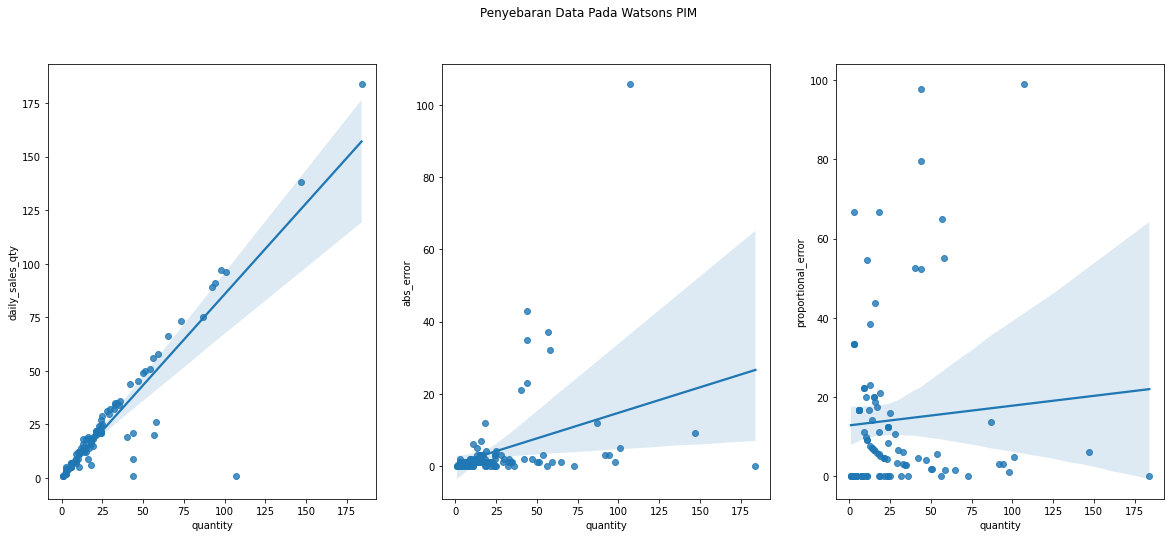

In [118]:
fig,axes = plt.subplots(1,3,figsize=(20,8))
fig.suptitle("Penyebaran Data Pada Watsons PIM")

sns.regplot(x = 'quantity' , y = 'daily_sales_qty',data= temp,ax=axes[0])
sns.regplot(x= 'quantity',y='abs_error',data= temp,ax=axes[1])
sns.regplot(x= 'quantity',y='proportional_error',data = temp,ax=axes[2])
plt.show()

In [119]:
temp[temp.proportional_error <25]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
0,9,59.0,58,1.0,1.0,1.694915
1,11,14.0,12,2.0,2.0,14.285714
2,12,12.0,14,-2.0,2.0,16.666667
3,13,42.0,44,-2.0,2.0,4.761905
4,73,147.0,138,9.0,9.0,6.122449
...,...,...,...,...,...,...
93,3143,17.0,14,3.0,3.0,17.647059
94,3144,87.0,75,12.0,12.0,13.793103
95,3145,15.0,12,3.0,3.0,20.000000
96,3146,65.0,66,-1.0,1.0,1.538462


<AxesSubplot:xlabel='default_code', ylabel='quantity'>

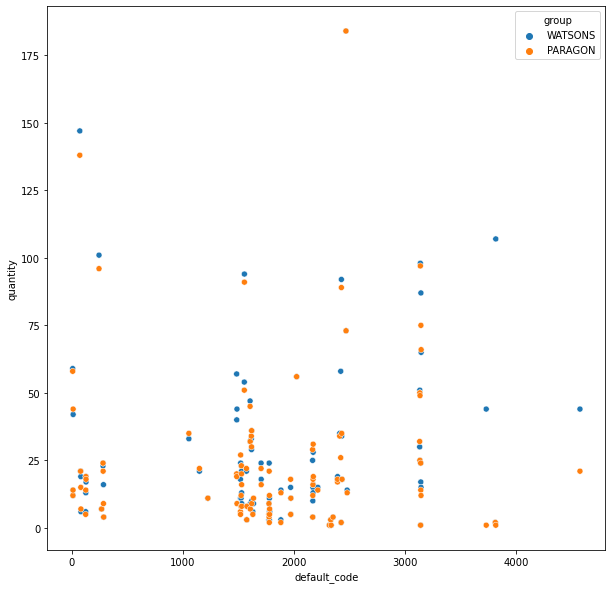

In [120]:
temp2 = pd.DataFrame()
temp2['default_code'] = temp.default_code
temp2['quantity'] = temp.quantity
temp2['group'] = "WATSONS"

temp3 = pd.DataFrame()
temp3['default_code'] = temp.default_code
temp3['quantity'] = temp.daily_sales_qty
temp3['group'] = "PARAGON"

temp4 = pd.concat([temp2,temp3],ignore_index=True)

fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x="default_code",y="quantity",hue='group',data=temp4,ax=axes)

In [121]:
def inttostr(integer):
    return str(integer[0])

temp.default_code = temp.apply(inttostr,axis=1)
temp

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
0,9.0,59.0,58,1.0,1.0,1.694915
1,11.0,14.0,12,2.0,2.0,14.285714
2,12.0,12.0,14,-2.0,2.0,16.666667
3,13.0,42.0,44,-2.0,2.0,4.761905
4,73.0,147.0,138,9.0,9.0,6.122449
...,...,...,...,...,...,...
96,3146.0,65.0,66,-1.0,1.0,1.538462
97,3732.0,44.0,1,43.0,43.0,97.727273
98,3814.0,2.0,2,0.0,0.0,0.000000
99,3818.0,107.0,1,106.0,106.0,99.065421


<AxesSubplot:xlabel='default_code', ylabel='quantity'>

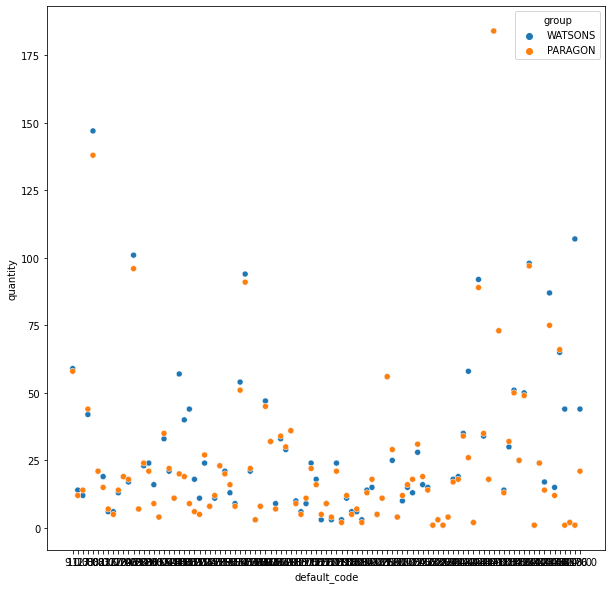

In [122]:
temp2 = pd.DataFrame()
temp2['default_code'] = temp.default_code
temp2['quantity'] = temp.quantity
temp2['group'] = "WATSONS"

temp3 = pd.DataFrame()
temp3['default_code'] = temp.default_code
temp3['quantity'] = temp.daily_sales_qty
temp3['group'] = "PARAGON"

temp4 = pd.concat([temp2,temp3],ignore_index=True)

fig,axes = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(x="default_code",y="quantity",hue='group',data=temp4,ax=axes)

##### Mean Absolute Percentage Error

In [123]:
# melihat Mean Absolute Percentage Error

temp.proportional_error.mean()

14.289606096691623

In [124]:
temp[temp.proportional_error > 40]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
16,286.0,16.0,9,7.0,7.0,43.750000
21,1485.0,57.0,20,37.0,37.0,64.912281
22,1486.0,40.0,19,21.0,21.0,52.500000
23,1488.0,44.0,9,35.0,35.0,79.545455
24,1519.0,18.0,6,12.0,12.0,66.666667
25,1520.0,11.0,5,6.0,6.0,54.545455
49,1775.0,3.0,5,-2.0,2.0,66.666667
78,2422.0,58.0,26,32.0,32.0,55.172414
97,3732.0,44.0,1,43.0,43.0,97.727273
99,3818.0,107.0,1,106.0,106.0,99.065421


#### Kejanggalan Pencatatan Data Watson dan BiVi

In [125]:
temp[temp.error <0]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error
2,12.0,12.0,14,-2.0,2.0,16.666667
3,13.0,42.0,44,-2.0,2.0,4.761905
7,83.0,6.0,7,-1.0,1.0,16.666667
9,127.0,13.0,14,-1.0,1.0,7.692308
11,129.0,17.0,18,-1.0,1.0,5.882353
14,282.0,23.0,24,-1.0,1.0,4.347826
18,1055.0,33.0,35,-2.0,2.0,6.060606
19,1150.0,21.0,22,-1.0,1.0,4.761905
26,1521.0,24.0,27,-3.0,3.0,12.500000
28,1525.0,11.0,12,-1.0,1.0,9.090909


data diatas adalah kumpulan produk yang pencatatan oleh BiVi lebih banyak dibanding dengan jumlah aslinya

In [126]:
bivi2022[(bivi2022.default_code == 2412) & (bivi2022.partner_name == "WATSONS PONDOK INDAH MALL (PIM)")]

,day,month,year,partner_ref,partner_name,default_code,product_name,daily_sales_qty
152298,25,2,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
154990,26,2,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
165832,1,3,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
230322,21,3,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
258250,29,3,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
269511,2,4,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
309847,17,4,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,4
447447,17,5,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1
470205,24,5,2022,118191-062,WATSONS PONDOK INDAH MALL (PIM),2412.0,Wardah Lightening Micellar Gentle Wash 50 ml,1


In [127]:
pim2_watson[(pim2_watson.default_code == 2412)]

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product


In [128]:
temp[temp.default_code ==2412.0]

,default_code,quantity,daily_sales_qty,error,abs_error,proportional_error


dilihat dari atas, BiVi mencatat Tranksasi yang tidak terjadi jika sesuai dengan data Watsons

### Profiling Report

In [129]:
profile = temp.profile_report(title="Profiling Pondok Indah Mall 2 Tahun 2022")
profile.to_file("Profiling/Pondok Indah Mall 2 Tahun 2022.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Test Other

In [130]:
data

,tanggal,code_watson,location_id,location,quantity,price_afterPPN,price_beforePPN,default_code,product
0,2021-06-01,14649.0,1.0,PONDOK INDAH MALL 2,1.0,23500.0,21363.64,1705,Wardah Hair Fall Treatment Conditioner 170 ml ...
1,2021-06-01,16257.0,1.0,PONDOK INDAH MALL 2,1.0,19500.0,17727.27,2393,Wardah Lightening Whip Facial Foam 50 ml
2,2021-06-01,16885.0,1.0,PONDOK INDAH MALL 2,2.0,48000.0,43636.36,2428,Wardah Lightening Face Toner 125 ml
3,2021-06-01,17208.0,1.0,PONDOK INDAH MALL 2,1.0,44900.0,40818.18,2469,Wardah UV Shield Aqua Fresh Essence SPF 50 30 ml
4,2021-06-01,47711.0,1.0,PONDOK INDAH MALL 2,1.0,31500.0,28636.36,1573,Wardah Acnederm Pore Refining Toner 100 ml (Pc...
...,...,...,...,...,...,...,...,...,...
281660,2022-05-29,55271.0,915.0,ECOMM HOME DELIVERY,1.0,22571.0,20334.23,3144,Wardah Crystal Secret Foaming Cleanser with Na...
281661,2022-05-29,11554.0,915.0,ECOMM HOME DELIVERY,2.0,123428.0,111196.40,2173,Wardah Crystallure Supreme Double Action Micel...
281662,2022-05-29,50799.0,915.0,ECOMM HOME DELIVERY,3.0,33568.0,30241.44,1971,Wardah Nature Daily Sheet Mask Aloe Vera 20 ml
281663,2022-05-29,50801.0,915.0,ECOMM HOME DELIVERY,3.0,33568.0,30241.44,1973,Wardah Nature Daily Sheet Mask Vitamin C 20 ml


In [131]:
total_data

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
0,2021-06-01,10568.0,EMINA CREAMYTINT 01 BRICK TOWN,1.0,PONDOK INDAH MALL 2,1.0,41800.00,38000.00
1,2021-06-01,10569.0,EMINA CREAMYTINT 02 PEACH CRUS,1.0,PONDOK INDAH MALL 2,1.0,41800.00,38000.00
2,2021-06-01,10573.0,MAKE OVER P/STAY FIX&MAT SET S,1.0,PONDOK INDAH MALL 2,3.0,220500.00,200454.55
3,2021-06-01,14649.0,WARDAH COND HF 170ML,1.0,PONDOK INDAH MALL 2,1.0,23500.00,21363.64
4,2021-06-01,14896.0,MO E/BROW DEFINITION KIT 02 GR,1.0,PONDOK INDAH MALL 2,1.0,115000.00,104545.45
...,...,...,...,...,...,...,...,...
1478535,2022-05-29,68141.0,EMINA S/RUSH LIP SCRUB,917.0,ECOMM CASH DELIVERY,1.0,23460.00,21135.14
1478536,2022-05-29,80428.0,EMINA DAILY MAT LOOSE PWDR 01,917.0,ECOMM CASH DELIVERY,1.0,24140.00,21747.75
1478537,2022-05-29,80460.0,MO STICK MATTE LIP CRAYON 105,917.0,ECOMM CASH DELIVERY,1.0,69429.00,62548.65
1478538,2022-05-29,85371.0,EMINA BRIGHT STUFF L/PWDR 55GR,917.0,ECOMM CASH DELIVERY,4.0,54338.00,48953.15


## Data-Data dengan Quantity =0 atau Harga =0 atau keduanya =0

In [132]:
total_data

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
0,2021-06-01,10568.0,EMINA CREAMYTINT 01 BRICK TOWN,1.0,PONDOK INDAH MALL 2,1.0,41800.00,38000.00
1,2021-06-01,10569.0,EMINA CREAMYTINT 02 PEACH CRUS,1.0,PONDOK INDAH MALL 2,1.0,41800.00,38000.00
2,2021-06-01,10573.0,MAKE OVER P/STAY FIX&MAT SET S,1.0,PONDOK INDAH MALL 2,3.0,220500.00,200454.55
3,2021-06-01,14649.0,WARDAH COND HF 170ML,1.0,PONDOK INDAH MALL 2,1.0,23500.00,21363.64
4,2021-06-01,14896.0,MO E/BROW DEFINITION KIT 02 GR,1.0,PONDOK INDAH MALL 2,1.0,115000.00,104545.45
...,...,...,...,...,...,...,...,...
1478535,2022-05-29,68141.0,EMINA S/RUSH LIP SCRUB,917.0,ECOMM CASH DELIVERY,1.0,23460.00,21135.14
1478536,2022-05-29,80428.0,EMINA DAILY MAT LOOSE PWDR 01,917.0,ECOMM CASH DELIVERY,1.0,24140.00,21747.75
1478537,2022-05-29,80460.0,MO STICK MATTE LIP CRAYON 105,917.0,ECOMM CASH DELIVERY,1.0,69429.00,62548.65
1478538,2022-05-29,85371.0,EMINA BRIGHT STUFF L/PWDR 55GR,917.0,ECOMM CASH DELIVERY,4.0,54338.00,48953.15


In [133]:
bivi

,day,month,year,partner_ref,partner_name,default_code,product_name,daily_sales_qty
0,1,6,2021,118191-002,WATSONS BUAH BATU,1485.0,Wardah Anti Dandruff Shampoo 170 ml (pc(s)),1
1,1,6,2021,118191-002,WATSONS BUAH BATU,1638.0,Wardah Perfect Bright Moisturizer SPF 28 20 ml,1
2,1,6,2021,118191-003,WATSONS CIHAMPELAS WALK,2395.0,Wardah Lightening Oil-Infused Micellar Water 5...,1
3,1,6,2021,118191-003,WATSONS CIHAMPELAS WALK,1637.0,Wardah Perfect Bright Moisturizer Normal Skin ...,1
4,1,6,2021,118191-003,WATSONS CIHAMPELAS WALK,1619.0,Wardah Nature Daily Aloe Hydramild Facial Wash...,1
...,...,...,...,...,...,...,...,...
1036929,29,5,2022,138701-203,WATSONS TEBET STREET,3537.0,Emina Watercolor Lip Serum 03 Dusk 2 g,1
1036930,29,5,2022,138701-203,WATSONS TEBET STREET,2403.0,Wardah Lightening Liquid Concealer 01 Light 7 ...,1
1036931,29,5,2022,138701-203,WATSONS TEBET STREET,777.0,Emina Cheek Lit Pressed Blush Bittersweet 3.5 ...,1
1036932,29,5,2022,138701-203,WATSONS TEBET STREET,79.0,"Wardah Eyexpert Staylast Liquid Eyeliner 3,5 g...",1


In [134]:
total_data[total_data.Quantity == 0]

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
1028,2021-06-01,11551.0,Crystallure Act Booster Essenc,23.0,SUMMARECON BEKASI,0.0,0.0,0.00
1484,2021-06-01,15789.0,WARDAH COLORFIT VEL LIP/MAT 13,29.0,CIBINONG CITY MALL,0.0,0.0,0.00
1726,2021-06-01,19255.0,MO HYDRASTAY GL/CUSHION W42 WA,32.0,BINTAROJAYA EXCHANGE,0.0,0.0,0.00
9155,2021-06-02,50334.0,WARDAH MIN+CLRFY FF 100ML,93.0,LIV PLAZA BALIKPAPAN,0.0,0.0,0.00
14306,2021-06-03,19235.0,EMINA SKIN BUDDY FACE TONER 10,125.0,SUNTER MALL,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...
1453106,2022-05-25,83554.0,MO P/STAY MAT PWDR FDT W33,808.0,SHOPEE WATSONS,0.0,3200.0,2882.88
1458627,2022-05-26,64721.0,MO E/LINER PCL BLACK JACK,149.0,THEE MATIC MAJALAYA,0.0,0.0,0.00
1464302,2022-05-27,94800.0,WARDAH EYE BROW PCL BROWN,180.0,CITRA GARDEN 2,0.0,0.0,0.00
1470613,2022-05-28,24889.0,EMINA D/MATE COMP PWDR 01 LIGH,162.0,THEPARK MAL SAWANGAN,0.0,0.0,0.00


In [135]:
total_data[total_data.Quantity < 0]

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
12795,2021-06-03,63996.0,WARDAH CRM FDT LF SHR PINK 01,52.0,BAYWALK MALL PLUIT,-1.0,-29600.0,-26909.09
37903,2021-06-07,94754.0,WARDAH EYE LINER PCL BLACK,121.0,NEW DP MALL SEMARANG,-1.0,-42000.0,-38181.82
47887,2021-06-10,82983.0,MO E/LNR HYPERBLACK SUPERSTAY,2.0,MALL KELAPA GADING 3,-1.0,-118750.0,-107954.55
113002,2021-06-26,18237.0,WARDAH EYELINER BLACK+VE MASCA,83.0,LOTTE FATMAWATI,-2.0,-229800.0,-208909.09
113025,2021-06-26,82918.0,WARDAH EYE.XPRT E/BROW KIT 3GR,83.0,LOTTE FATMAWATI,-1.0,-63000.0,-57272.73
...,...,...,...,...,...,...,...,...
1453157,2022-05-25,16883.0,WARDAH LIGHTENING BLUE CLAY MA,813.0,TOKOPEDIA,-1.0,-20000.0,-18018.02
1453178,2022-05-25,54098.0,WARDAH C/S BRIGHT DAY CREAM 30,813.0,TOKOPEDIA,-1.0,-81700.0,-73603.60
1453185,2022-05-25,63100.0,WARDAH E/DAY BB CRM NTRL 30ML,813.0,TOKOPEDIA,-1.0,-34600.0,-31171.17
1453190,2022-05-25,80579.0,WARDAH E/X VOLUM XPERT MASCARA,813.0,TOKOPEDIA,-1.0,-57300.0,-51621.62


In [136]:
total_data[total_data.Price_AfterPPN < 0]

,Tanggal,PLU,Product,Location_ID,Location,Quantity,Price_AfterPPN,Price_BeforePPN
12795,2021-06-03,63996.0,WARDAH CRM FDT LF SHR PINK 01,52.0,BAYWALK MALL PLUIT,-1.0,-29600.0,-26909.09
37903,2021-06-07,94754.0,WARDAH EYE LINER PCL BLACK,121.0,NEW DP MALL SEMARANG,-1.0,-42000.0,-38181.82
47887,2021-06-10,82983.0,MO E/LNR HYPERBLACK SUPERSTAY,2.0,MALL KELAPA GADING 3,-1.0,-118750.0,-107954.55
49088,2021-06-10,96961.0,WARDAH EYE BROW PCL BLACK,50.0,GAJAH MADA PLAZA,0.0,-37000.0,-33636.36
113002,2021-06-26,18237.0,WARDAH EYELINER BLACK+VE MASCA,83.0,LOTTE FATMAWATI,-2.0,-229800.0,-208909.09
...,...,...,...,...,...,...,...,...
1453157,2022-05-25,16883.0,WARDAH LIGHTENING BLUE CLAY MA,813.0,TOKOPEDIA,-1.0,-20000.0,-18018.02
1453178,2022-05-25,54098.0,WARDAH C/S BRIGHT DAY CREAM 30,813.0,TOKOPEDIA,-1.0,-81700.0,-73603.60
1453185,2022-05-25,63100.0,WARDAH E/DAY BB CRM NTRL 30ML,813.0,TOKOPEDIA,-1.0,-34600.0,-31171.17
1453190,2022-05-25,80579.0,WARDAH E/X VOLUM XPERT MASCARA,813.0,TOKOPEDIA,-1.0,-57300.0,-51621.62


profile = total_data.profile_report(title="Keseluruhan Data Watsons")
<br>profile.to_file("Profiling/Keseluruhan Data Watsons.html")

profile = data.profile_report(title="Watsons Setelah Mapping Product")
<br>profile.to_file("Profiling/Watsons Setelah Mapping Product.html")

profile = bivi.profile_report(title="Data BiVi Paragon")
<br>profile.to_file("Profiling/Data BiVi Paragon.html")